## Problem Statement 

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight 
teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. 
The IPL is the most-attended cricket league in the world. By analysing the players on different aspects like Batting, Bowling and Fielding, 
let us try to find the value they add to their teams and thus the role they play in winning the tournament.

In [ ]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.max_rows = None   
import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [ ]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

     |████████████████████████████████| 12.9MB 335kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Install chart_studio, please use this command. 

!pip install chart-studio

     |████████████████████████████████| 71kB 1.5MB/s 


In [ ]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the 1st dataset

df_matches = pd.read_csv("/content/drive/My Drive/Colab Notebooks/matches.csv")
df_matches.head()

id  season       city        date                        team1  \
0  1   2017    Hyderabad  2017-04-05  Sunrisers Hyderabad           
1  2   2017    Pune       2017-04-06  Mumbai Indians                
2  3   2017    Rajkot     2017-04-07  Gujarat Lions                 
3  4   2017    Indore     2017-04-08  Rising Pune Supergiant        
4  5   2017    Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore  field          
1  Rising Pune Supergiant       Rising Pune Supergiant       field          
2  Kolkata Knight Riders        Kolkata Knight Riders        field          
3  Kings XI Punjab              Kings XI Punjab              field          
4  Delhi Daredevils             Royal Challengers Bangalore  bat            

   result  dl_applied                       winner  win_by_runs  \
0  normal  0           Sunrisers Hyderabad          35            
1  normal  0           Rising Pune Supergiant       0             
2  normal  0           Kolkata Knight Riders        0             
3  normal  0           Kings XI Punjab              0             
4  normal  0           Royal Challengers Bangalore  15            

   win_by_wickets player_of_match                                      venue  \
0  0               Yuvraj Singh    Rajiv Gandhi International Stadium, Uppal   
1  7               SPD Smith       Maharashtra Cricket Association Stadium     
2  10              CA Lynn         Saurashtra Cricket Association Stadium      
3  6               GJ Maxwell      Holkar Cricket Stadium                      
4  0               KM Jadhav       M Chinnaswamy Stadium                       

          umpire1        umpire2 umpire3  
0  AY Dandekar     NJ Llong       NaN     
1  A Nand Kishore  S Ravi         NaN     
2  Nitin Menon     CK Nandan      NaN     
3  AK Chaudhary    C Shamshuddin  NaN     
4  NaN             NaN            NaN

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [ ]:
df_matches.isnull().sum()

id                 0  
season             0  
city               7  
date               0  
team1              0  
team2              0  
toss_winner        0  
toss_decision      0  
result             0  
dl_applied         0  
winner             3  
win_by_runs        0  
win_by_wickets     0  
player_of_match    3  
venue              0  
umpire1            1  
umpire2            1  
umpire3            636
dtype: int64

Missing Data - 

city               7  - can be ignored as the match was played and had a result

winner & player_of_match            3  - Match ended in "No Result" state  

umpire1 & umpire2           1  - ignore the missing data

umpire3            636 - the third empire was not needed

In [ ]:
display(df_matches[df_matches.winner.isnull()])

id  season       city        date                        team1  \
300  301  2011    Delhi      2011-05-21  Delhi Daredevils              
545  546  2015    Bangalore  2015-04-29  Royal Challengers Bangalore   
570  571  2015    Bangalore  2015-05-17  Delhi Daredevils              

                           team2                  toss_winner toss_decision  \
300  Pune Warriors                Delhi Daredevils             bat            
545  Rajasthan Royals             Rajasthan Royals             field          
570  Royal Challengers Bangalore  Royal Challengers Bangalore  field          

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result  0           NaN    0            0                
545  no result  0           NaN    0            0                
570  no result  0           NaN    0            0                

    player_of_match                  venue          umpire1       umpire2  \
300  NaN             Feroz Shah Kotla       SS Hazare        RJ Tucker      
545  NaN             M Chinnaswamy Stadium  JD Cloete        PG Pathak      
570  NaN             M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan   

    umpire3  
300  NaN     
545  NaN     
570  NaN

In [ ]:
display(df_matches[df_matches.player_of_match.isnull()])

id  season       city        date                        team1  \
300  301  2011    Delhi      2011-05-21  Delhi Daredevils              
545  546  2015    Bangalore  2015-04-29  Royal Challengers Bangalore   
570  571  2015    Bangalore  2015-05-17  Delhi Daredevils              

                           team2                  toss_winner toss_decision  \
300  Pune Warriors                Delhi Daredevils             bat            
545  Rajasthan Royals             Rajasthan Royals             field          
570  Royal Challengers Bangalore  Royal Challengers Bangalore  field          

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result  0           NaN    0            0                
545  no result  0           NaN    0            0                
570  no result  0           NaN    0            0                

    player_of_match                  venue          umpire1       umpire2  \
300  NaN             Feroz Shah Kotla       SS Hazare        RJ Tucker      
545  NaN             M Chinnaswamy Stadium  JD Cloete        PG Pathak      
570  NaN             M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan   

    umpire3  
300  NaN     
545  NaN     
570  NaN

In [ ]:
display(df_matches[df_matches.city.isnull()])

id  season city        date                        team1  \
461  462  2014    NaN  2014-04-19  Mumbai Indians                
462  463  2014    NaN  2014-04-19  Kolkata Knight Riders         
466  467  2014    NaN  2014-04-23  Chennai Super Kings           
468  469  2014    NaN  2014-04-25  Sunrisers Hyderabad           
469  470  2014    NaN  2014-04-25  Mumbai Indians                
474  475  2014    NaN  2014-04-28  Royal Challengers Bangalore   
476  477  2014    NaN  2014-04-30  Sunrisers Hyderabad           

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore  field          
462  Delhi Daredevils             Kolkata Knight Riders        bat            
466  Rajasthan Royals             Rajasthan Royals             field          
468  Delhi Daredevils             Sunrisers Hyderabad          bat            
469  Chennai Super Kings          Mumbai Indians               bat            
474  Kings XI Punjab              Kings XI Punjab              field          
476  Mumbai Indians               Mumbai Indians               field          

     result  dl_applied                       winner  win_by_runs  \
461  normal  0           Royal Challengers Bangalore  0             
462  normal  0           Delhi Daredevils             0             
466  normal  0           Chennai Super Kings          7             
468  normal  0           Sunrisers Hyderabad          4             
469  normal  0           Chennai Super Kings          0             
474  normal  0           Kings XI Punjab              0             
476  normal  0           Sunrisers Hyderabad          15            

     win_by_wickets player_of_match                                venue  \
461  7               PA Patel        Dubai International Cricket Stadium   
462  4               JP Duminy       Dubai International Cricket Stadium   
466  0               RA Jadeja       Dubai International Cricket Stadium   
468  0               AJ Finch        Dubai International Cricket Stadium   
469  7               MM Sharma       Dubai International Cricket Stadium   
474  5               Sandeep Sharma  Dubai International Cricket Stadium   
476  0               B Kumar         Dubai International Cricket Stadium   

             umpire1         umpire2 umpire3  
461  Aleem Dar        AK Chaudhary    NaN     
462  Aleem Dar        VA Kulkarni     NaN     
466  HDPK Dharmasena  RK Illingworth  NaN     
468  M Erasmus        S Ravi          NaN     
469  BF Bowden        M Erasmus       NaN     
474  BF Bowden        S Ravi          NaN     
476  HDPK Dharmasena  M Erasmus       NaN

In [ ]:
display(df_matches[df_matches.umpire1.isnull()])

id  season       city        date                        team1  \
4  5   2017    Bangalore  2017-04-08  Royal Challengers Bangalore   

              team2                  toss_winner toss_decision  result  \
4  Delhi Daredevils  Royal Challengers Bangalore  bat           normal   

   dl_applied                       winner  win_by_runs  win_by_wickets  \
4  0           Royal Challengers Bangalore  15           0                

  player_of_match                  venue umpire1 umpire2 umpire3  
4  KM Jadhav       M Chinnaswamy Stadium  NaN     NaN     NaN

In [ ]:
display(df_matches[df_matches.umpire2.isnull()])

id  season       city        date                        team1  \
4  5   2017    Bangalore  2017-04-08  Royal Challengers Bangalore   

              team2                  toss_winner toss_decision  result  \
4  Delhi Daredevils  Royal Challengers Bangalore  bat           normal   

   dl_applied                       winner  win_by_runs  win_by_wickets  \
4  0           Royal Challengers Bangalore  15           0                

  player_of_match                  venue umpire1 umpire2 umpire3  
4  KM Jadhav       M Chinnaswamy Stadium  NaN     NaN     NaN

**Match Seasons**

In [ ]:
display(len(df_matches.season.unique()))
df_matches.season.unique()


11

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018])

**Participating Teams**

In [ ]:
team1List = df_matches.team1.unique()
#display(team1List)

team2List = df_matches.team2.unique()
#display(team2List)

teamsParticipating = np.append(team1List, team2List, axis=0)
teamsParticipating

teamsParticipating = pd.DataFrame(data=teamsParticipating, columns=["Teams_Participating"])
teamsParticipating = teamsParticipating.Teams_Participating.unique()

display(len(teamsParticipating))
teamsParticipating

14

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

'Rising Pune Supergiant'; 'Rising Pune Supergiants'; 'Pune Warriors'
3 teams from Pune - let's observe-
- are they unique teams
- did they play in different seasons

In [ ]:
search_values = ['Rising Pune Supergiant','Rising Pune Supergiants','Pune Warriors']
pune_teams_play_season = df_matches[df_matches.team1.str.contains('|'.join(search_values ))]
pune_teams_play_season = pune_teams_play_season.groupby(['season','team1']).size()
pune_teams_play_season.reset_index()
pune_teams_play_season.columns = [['season','team1', 'matches played']]
pune_teams_play_season.columns

pune_teams_play_season

season  team1                  
2011    Pune Warriors              6
2012    Pune Warriors              7
2013    Pune Warriors              7
2016    Rising Pune Supergiants    7
2017    Rising Pune Supergiant     8
dtype: int64

Our assumption is correct, 'Rising Pune Supergiant','Rising Pune Supergiants','Pune Warriors' are unique teams and played in different seasons

In [ ]:
df_deliveries = pd.read_csv("/content/drive/My Drive/Colab Notebooks/deliveries.csv")
df_deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0  1         1       Sunrisers Hyderabad  Royal Challengers Bangalore  1      
1  1         1       Sunrisers Hyderabad  Royal Challengers Bangalore  1      
2  1         1       Sunrisers Hyderabad  Royal Challengers Bangalore  1      
3  1         1       Sunrisers Hyderabad  Royal Challengers Bangalore  1      
4  1         1       Sunrisers Hyderabad  Royal Challengers Bangalore  1      

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0  1     DA Warner  S Dhawan    TS Mills  0              0          0          
1  2     DA Warner  S Dhawan    TS Mills  0              0          0          
2  3     DA Warner  S Dhawan    TS Mills  0              0          0          
3  4     DA Warner  S Dhawan    TS Mills  0              0          0          
4  5     DA Warner  S Dhawan    TS Mills  0              2          0          

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0  0            0            0             0             0            
1  0            0            0             0             0            
2  0            0            0             4             0            
3  0            0            0             0             0            
4  0            0            0             0             2            

   total_runs player_dismissed dismissal_kind fielder  
0  0           NaN              NaN            NaN     
1  0           NaN              NaN            NaN     
2  4           NaN              NaN            NaN     
3  0           NaN              NaN            NaN     
4  2           NaN              NaN            NaN

In [ ]:
#df_matches['team1'].replace(['Rising Pune Supergiant'], 'Rising Pune Supergiants')




**Total matches** played across seasons and with winners

In [ ]:
df_matches_winner = df_matches[df_matches.winner.notnull()]
df_matches_winner

len(df_matches_winner)

693

In [ ]:
df_matches_no_winner = df_matches[df_matches.winner.isnull()]
df_matches_no_winner

len(df_matches_no_winner)

3

In [ ]:
matches_played = df_matches.groupby(['season']).size()
matches_played = pd.DataFrame(data = matches_played, columns = ['matches played per season'])
#total_matches_seasons.reset_index(inplace=True)
display(matches_played) # total matches played per season
matches_played.columns

matches played per season
season                           
2008    58                       
2009    57                       
2010    60                       
2011    73                       
2012    74                       
2013    76                       
2014    60                       
2015    59                       
2016    60                       
2017    59                       
2018    60

Index(['matches played per season'], dtype='object')

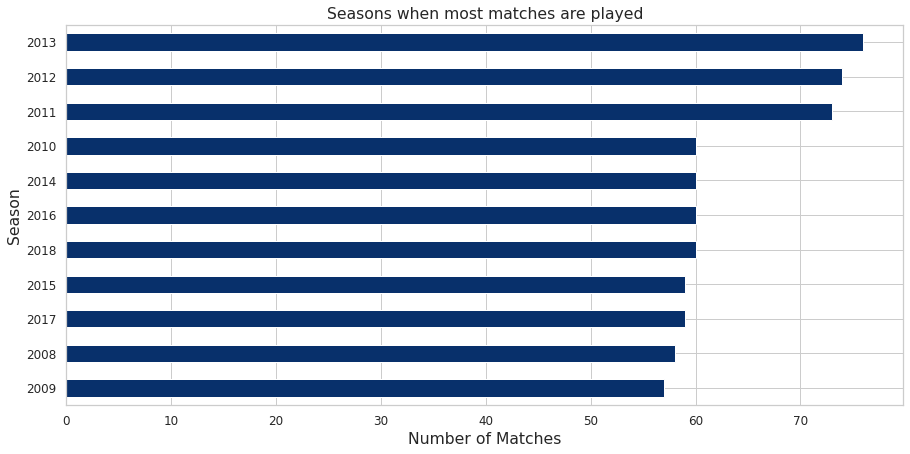

In [ ]:
df_matches['season'].value_counts(normalize=False).sort_values(ascending=True)[:14].sort_values(ascending=True).plot(kind='barh', figsize=(15,7), colormap='Blues_r', 
                                                    fontsize=12, yticks=np.arange(0,20000,3000))


plt.xlabel('Number of Matches')
plt.ylabel('Season')
plt.title('Seasons when most matches are played')
plt.show()


In [ ]:
ax = df_matches['season'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("IPL Matches played per season", fontsize=14)
ax.set_xlabel("Number of Matches", fontsize=14);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [ ]:
total_matches_seasons = df_matches.groupby(['season', 'team1']).size()
total_matches_seasons = pd.DataFrame(data = total_matches_seasons, columns = ['no of matches'])
total_matches_seasons = total_matches_seasons.sort_values(['no of matches'],ascending=[False])
total_matches_seasons.reset_index(inplace=True)
display(total_matches_seasons.head())
display(total_matches_seasons.columns)

season                team1  no of matches
0  2012    Chennai Super Kings  12           
1  2011    Chennai Super Kings  12           
2  2010    Mumbai Indians       11           
3  2015    Chennai Super Kings  11           
4  2012    Deccan Chargers      11

Index(['season', 'team1', 'no of matches'], dtype='object')

In [ ]:
plt.figure(figsize=(200,100));
teams_plot = sns.catplot(y="no of matches", x="team1", kind="box",
            data=total_matches_seasons.sort_values("no of matches"), legend_out=True);
teams_plot.set_xticklabels(rotation=90);

<Figure size 14400x7200 with 0 Axes>

In [ ]:
teamsParticipating


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

'Delhi Daredevils','Royal Challengers Bangalore','Kolkata Knight Riders',....

In [ ]:
df_matches_3rdUmpire = df_matches[df_matches.umpire3.notnull()]
df_matches_3rdUmpire.head()

len(df_matches_3rdUmpire)


60

In [ ]:
df_matches_no_3rdUmpire = df_matches[df_matches.umpire3.isnull()]
df_matches_no_3rdUmpire

len(df_matches_no_3rdUmpire)


636

In [ ]:
player_of_the_match= pd.pivot_table(df_matches,values=['player_of_match'],index=['season'],columns=['city'],aggfunc='count',margins=False)

plt.figure(figsize=(12,12))
sns.heatmap(player_of_the_match['player_of_match'],linewidths=.5,annot=True,vmin=0.01,cmap='YlGnBu')
plt.title('Number of player of the match in cities for particular year')

Text(0.5, 1.0, 'Number of player of the match in cities for particular year')

In [ ]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
win_stats = (df_matches.groupby(['winner','player_of_match']).size().sort_values(ascending=False))
win_stats = pd.DataFrame(win_stats)
win_stats.reset_index(inplace=True)
win_stats.columns = ['winner','player_of_match','no of times']
win_stats = win_stats.head(20)
win_stats

winner player_of_match  no of times
0   Royal Challengers Bangalore  CH Gayle        17         
1   Royal Challengers Bangalore  AB de Villiers  16         
2   Mumbai Indians               RG Sharma       13         
3   Chennai Super Kings          SK Raina        12         
4   Chennai Super Kings          MS Dhoni        12         
5   Royal Challengers Bangalore  V Kohli         10         
6   Chennai Super Kings          MEK Hussey      10         
7   Delhi Daredevils             V Sehwag        10         
8   Rajasthan Royals             AM Rahane       10         
9   Kolkata Knight Riders        G Gambhir       10         
10  Sunrisers Hyderabad          DA Warner       10         
11  Mumbai Indians               KA Pollard      9          
12  Rajasthan Royals             SR Watson       9          
13  Kings XI Punjab              SE Marsh        9          
14  Kolkata Knight Riders        SP Narine       8          
15  Mumbai Indians               SR Tendulkar    8          
16  Chennai Super Kings          RA Jadeja       8          
17  Rajasthan Royals             YK Pathan       8          
18  Kolkata Knight Riders        AD Russell      7          
19  Mumbai Indians               AT Rayudu       7

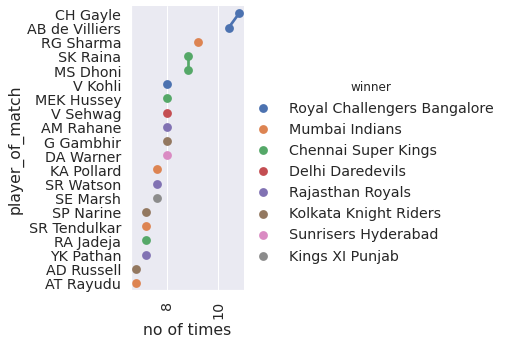

In [ ]:
g = sns.catplot(y="player_of_match", x="no of times", hue="winner", kind="point", data=win_stats);
g.set_xticklabels(rotation=90);


In [ ]:
df_matches.head()

id  season       city        date                        team1  \
0  1   2017    Hyderabad  2017-04-05  Sunrisers Hyderabad           
1  2   2017    Pune       2017-04-06  Mumbai Indians                
2  3   2017    Rajkot     2017-04-07  Gujarat Lions                 
3  4   2017    Indore     2017-04-08  Rising Pune Supergiant        
4  5   2017    Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore  field          
1  Rising Pune Supergiant       Rising Pune Supergiant       field          
2  Kolkata Knight Riders        Kolkata Knight Riders        field          
3  Kings XI Punjab              Kings XI Punjab              field          
4  Delhi Daredevils             Royal Challengers Bangalore  bat            

   result  dl_applied                       winner  win_by_runs  \
0  normal  0           Sunrisers Hyderabad          35            
1  normal  0           Rising Pune Supergiant       0             
2  normal  0           Kolkata Knight Riders        0             
3  normal  0           Kings XI Punjab              0             
4  normal  0           Royal Challengers Bangalore  15            

   win_by_wickets player_of_match                                      venue  \
0  0               Yuvraj Singh    Rajiv Gandhi International Stadium, Uppal   
1  7               SPD Smith       Maharashtra Cricket Association Stadium     
2  10              CA Lynn         Saurashtra Cricket Association Stadium      
3  6               GJ Maxwell      Holkar Cricket Stadium                      
4  0               KM Jadhav       M Chinnaswamy Stadium                       

          umpire1        umpire2 umpire3  
0  AY Dandekar     NJ Llong       NaN     
1  A Nand Kishore  S Ravi         NaN     
2  Nitin Menon     CK Nandan      NaN     
3  AK Chaudhary    C Shamshuddin  NaN     
4  NaN             NaN            NaN

In [ ]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df_deliveries.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

In [ ]:
batsman_list = df_deliveries.batsman.unique()
display(batsman_list)



array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [ ]:
bowler_list = df_deliveries.bowler.unique()

display(bowler_list)


array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [ ]:
all_rounders = list(set(batsman_list).intersection(bowler_list))
all_rounders

['DP Nannes',
 'RJ Harris',
 'RR Raje',
 'RJ Peterson',
 'SK Trivedi',
 'PM Sarvesh Kumar',
 'JEC Franklin',
 'AC Thomas',
 'P Awana',
 'J Searles',
 'SN Thakur',
 'SC Ganguly',
 'Mustafizur Rahman',
 'MJ Clarke',
 'MA Starc',
 'Joginder Sharma',
 'J Yadav',
 'D Kalyankrishna',
 'YA Abdulla',
 'JR Hopes',
 'Mohammed Siraj',
 'NL McCullum',
 'DJ Muthuswami',
 'AC Voges',
 'AD Mathews',
 'DJ Harris',
 'MA Khote',
 'SR Watson',
 'GH Vihari',
 'Swapnil Singh',
 'MG Johnson',
 'RG Sharma',
 'DJ Hooda',
 'AS Rajpoot',
 'AF Milne',
 'A Nehra',
 'DR Smith',
 'R Sathish',
 'A Chandila',
 'M Lomror',
 'Mohammad Asif',
 'SK Raina',
 'BJ Rohrer',
 'MR Marsh',
 'KP Pietersen',
 'M Wood',
 'AR Patel',
 'J Theron',
 'M Manhas',
 'SB Jakati',
 'GD McGrath',
 'L Balaji',
 'RE van der Merwe',
 'M Muralitharan',
 'Sohail Tanvir',
 'CK Langeveldt',
 'KC Cariappa',
 'BA Bhatt',
 'KV Sharma',
 'A Kumble',
 'CRD Fernando',
 'VRV Singh',
 'N Rana',
 'Ankit Sharma',
 'AB Agarkar',
 'ST Jayasuriya',
 'Mashrafe 

In [ ]:
print(len(batsman_list), " batsmen played in IPL")
print(len(bowler_list), " bowlers in IPL")
print(len(all_rounders), " all rounders IPL")

488  batsmen played in IPL
378  bowlers in IPL
340  all rounders IPL


In [ ]:
df_merge_matches_del = pd.merge(df_matches, df_deliveries, left_on = 'id', right_on = 'match_id', how = 'outer')
cols = ['id', 'match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder']
df_merge_matches_del = df_merge_matches_del[cols]
df_merge_matches_del.columns
df_merge_matches_del.drop(columns=['id'],inplace=True)
df_merge_matches_del.head()

match_id  season       city        date                team1  \
0  1         2017    Hyderabad  2017-04-05  Sunrisers Hyderabad   
1  1         2017    Hyderabad  2017-04-05  Sunrisers Hyderabad   
2  1         2017    Hyderabad  2017-04-05  Sunrisers Hyderabad   
3  1         2017    Hyderabad  2017-04-05  Sunrisers Hyderabad   
4  1         2017    Hyderabad  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore  field          
1  Royal Challengers Bangalore  Royal Challengers Bangalore  field          
2  Royal Challengers Bangalore  Royal Challengers Bangalore  field          
3  Royal Challengers Bangalore  Royal Challengers Bangalore  field          
4  Royal Challengers Bangalore  Royal Challengers Bangalore  field          

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal  0           Sunrisers Hyderabad  35           0                
1  normal  0           Sunrisers Hyderabad  35           0                
2  normal  0           Sunrisers Hyderabad  35           0                
3  normal  0           Sunrisers Hyderabad  35           0                
4  normal  0           Sunrisers Hyderabad  35           0                

  player_of_match                                      venue      umpire1  \
0  Yuvraj Singh    Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1  Yuvraj Singh    Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
2  Yuvraj Singh    Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
3  Yuvraj Singh    Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
4  Yuvraj Singh    Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2 umpire3  inning         batting_team                 bowling_team  \
0  NJ Llong  NaN     1       Sunrisers Hyderabad  Royal Challengers Bangalore   
1  NJ Llong  NaN     1       Sunrisers Hyderabad  Royal Challengers Bangalore   
2  NJ Llong  NaN     1       Sunrisers Hyderabad  Royal Challengers Bangalore   
3  NJ Llong  NaN     1       Sunrisers Hyderabad  Royal Challengers Bangalore   
4  NJ Llong  NaN     1       Sunrisers Hyderabad  Royal Challengers Bangalore   

   over  ball    batsman non_striker    bowler  is_super_over  wide_runs  \
0  1     1     DA Warner  S Dhawan    TS Mills  0              0           
1  1     2     DA Warner  S Dhawan    TS Mills  0              0           
2  1     3     DA Warner  S Dhawan    TS Mills  0              0           
3  1     4     DA Warner  S Dhawan    TS Mills  0              0           
4  1     5     DA Warner  S Dhawan    TS Mills  0              2           

   bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0  0         0            0            0             0             0            
1  0         0            0            0             0             0            
2  0         0            0            0             4             0            
3  0         0            0            0             0             0            
4  0         0            0            0             0             2            

   total_runs player_dismissed dismissal_kind fielder  
0  0           NaN              NaN            NaN     
1  0           NaN              NaN            NaN     
2  4           NaN              NaN            NaN     
3  0           NaN              NaN            NaN     
4  2           NaN              NaN            NaN

**BOWLING STATS**

In [ ]:
bowling_stats = df_merge_matches_del[['season','match_id','inning','batting_team','bowling_team','player_dismissed','dismissal_kind','extra_runs','bowler','fielder']]

bowling_stats = bowling_stats[bowling_stats.player_dismissed.notnull()]
display(bowling_stats.head(20))


season  match_id  inning                 batting_team  \
11   2017    1         1       Sunrisers Hyderabad           
64   2017    1         1       Sunrisers Hyderabad           
94   2017    1         1       Sunrisers Hyderabad           
116  2017    1         1       Sunrisers Hyderabad           
160  2017    1         2       Royal Challengers Bangalore   
165  2017    1         2       Royal Challengers Bangalore   
199  2017    1         2       Royal Challengers Bangalore   
206  2017    1         2       Royal Challengers Bangalore   
211  2017    1         2       Royal Challengers Bangalore   
230  2017    1         2       Royal Challengers Bangalore   
234  2017    1         2       Royal Challengers Bangalore   
235  2017    1         2       Royal Challengers Bangalore   
242  2017    1         2       Royal Challengers Bangalore   
247  2017    1         2       Royal Challengers Bangalore   
274  2017    2         1       Mumbai Indians                
287  2017    2         1       Mumbai Indians                
289  2017    2         1       Mumbai Indians                
316  2017    2         1       Mumbai Indians                
330  2017    2         1       Mumbai Indians                
343  2017    2         1       Mumbai Indians                

                    bowling_team player_dismissed     dismissal_kind  \
11   Royal Challengers Bangalore  DA Warner        caught              
64   Royal Challengers Bangalore  S Dhawan         caught              
94   Royal Challengers Bangalore  MC Henriques     caught              
116  Royal Challengers Bangalore  Yuvraj Singh     bowled              
160  Sunrisers Hyderabad          Mandeep Singh    bowled              
165  Sunrisers Hyderabad          CH Gayle         caught              
199  Sunrisers Hyderabad          KM Jadhav        run out             
206  Sunrisers Hyderabad          TM Head          caught              
211  Sunrisers Hyderabad          Sachin Baby      caught              
230  Sunrisers Hyderabad          STR Binny        caught              
234  Sunrisers Hyderabad          SR Watson        caught              
235  Sunrisers Hyderabad          S Aravind        bowled              
242  Sunrisers Hyderabad          TS Mills         caught              
247  Sunrisers Hyderabad          YS Chahal        run out             
274  Rising Pune Supergiant       PA Patel         bowled              
287  Rising Pune Supergiant       RG Sharma        bowled              
289  Rising Pune Supergiant       JC Buttler       lbw                 
316  Rising Pune Supergiant       AT Rayudu        caught and bowled   
330  Rising Pune Supergiant       KH Pandya        caught              
343  Rising Pune Supergiant       N Rana           caught              

     extra_runs        bowler          fielder  
11   0           A Choudhary   Mandeep Singh    
64   0           STR Binny     Sachin Baby      
94   0           YS Chahal     Sachin Baby      
116  0           TS Mills      NaN              
160  0           Rashid Khan   NaN              
165  0           DJ Hooda      DA Warner        
199  0           MC Henriques  BCJ Cutting      
206  0           Rashid Khan   Yuvraj Singh     
211  0           Bipul Sharma  MC Henriques     
230  0           B Kumar       Yuvraj Singh     
234  0           A Nehra       MC Henriques     
235  0           A Nehra       NaN              
242  0           B Kumar       DA Warner        
247  0           BCJ Cutting   CJ Jordan (sub)  
274  0           Imran Tahir   NaN              
287  0           Imran Tahir   NaN              
289  0           Imran Tahir   NaN              
316  0           R Bhatia      NaN              
330  0           R Bhatia      MS Dhoni         
343  0           A Zampa       R Bhatia

In [ ]:
bowling_stats_grouped = pd.DataFrame(bowling_stats.groupby(['season','bowling_team','bowler', 'batting_team','dismissal_kind','extra_runs']).size().sort_values(ascending=False))
#bowling_stats_grouped.head()
#display(bowling_stats_grouped.keys())
bowling_stats_grouped = bowling_stats_grouped.reset_index()
bowling_stats_grouped.columns = ['season','bowling_team', 'bowler', 'batting_team','dismissal_kind', 'extra_runs','wicket_taken']
#bowling_stats_grouped = bowling_stats_grouped.head(40)
bowling_stats_grouped[:10]

season         bowling_team       bowler                 batting_team  \
0  2015    Chennai Super Kings  A Nehra      Royal Challengers Bangalore   
1  2015    Chennai Super Kings  DJ Bravo     Mumbai Indians                
2  2013    Rajasthan Royals     JP Faulkner  Sunrisers Hyderabad           
3  2011    Mumbai Indians       MM Patel     Kings XI Punjab               
4  2013    Chennai Super Kings  DJ Bravo     Mumbai Indians                
5  2009    Kings XI Punjab      YA Abdulla   Royal Challengers Bangalore   
6  2010    Mumbai Indians       KA Pollard   Royal Challengers Bangalore   
7  2014    Chennai Super Kings  MM Sharma    Mumbai Indians                
8  2012    Delhi Daredevils     UT Yadav     Kings XI Punjab               
9  2018    Kings XI Punjab      AJ Tye       Rajasthan Royals              

  dismissal_kind  extra_runs  wicket_taken  
0  caught         0           8             
1  caught         0           8             
2  caught         0           8             
3  caught         0           7             
4  caught         0           7             
5  caught         0           6             
6  caught         0           6             
7  caught         0           6             
8  caught         0           6             
9  caught         0           6

<Figure size 1440x7200 with 0 Axes>

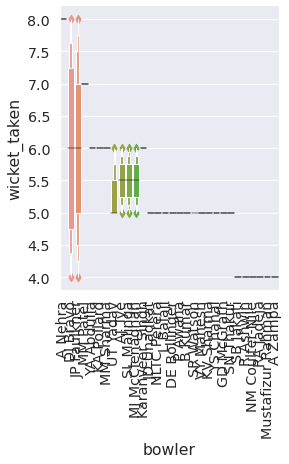

In [ ]:
c = bowling_stats_grouped.head(40)
plt.figure(figsize=(20,100))
teams_plot = sns.catplot(x="bowler", y="wicket_taken", kind="boxen",
            data=c, legend_out=True);
teams_plot.set_xticklabels(rotation=90)


[8 7 3 2]
range(0, 4)


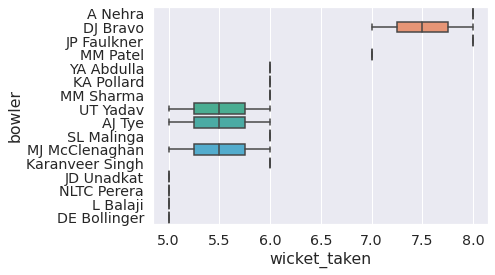

In [ ]:
#display(c.describe())
c= c.head(20)
ax = sns.boxplot(y="bowler", x="wicket_taken",  data=c, width=0.8, orient='h' )
 
# Calculate number of obs per group & median to position labels
medians = c.groupby(['bowler'])['wicket_taken'].median().values

nobs = c['wicket_taken'].value_counts().values
print(nobs)
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
print(pos)
#for tick,label in zip(pos,ax.get_xticklabels()):
#    print(tick,label)
#    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
#    horizontalalignment='center', 
#    size='x-small', color='b', weight='semibold')
#sns.plt.show()

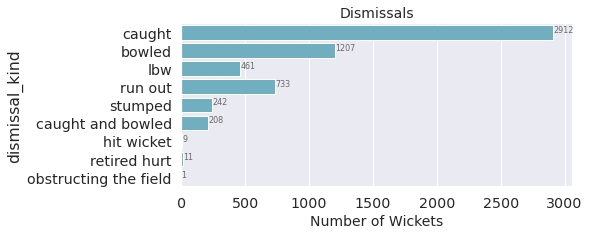

In [ ]:

f, ax = plt.subplots(figsize=(7, 3))
ax = sns.countplot(y="dismissal_kind", data=bowling_stats_grouped,color="c");




ax.set_alpha(0.8)
ax.set_title("Dismissals", fontsize=14)
ax.set_xlabel("Number of Wickets", fontsize=14);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=8,
color='dimgrey')

# invert for largest on top 
#ax.invert_yaxis()

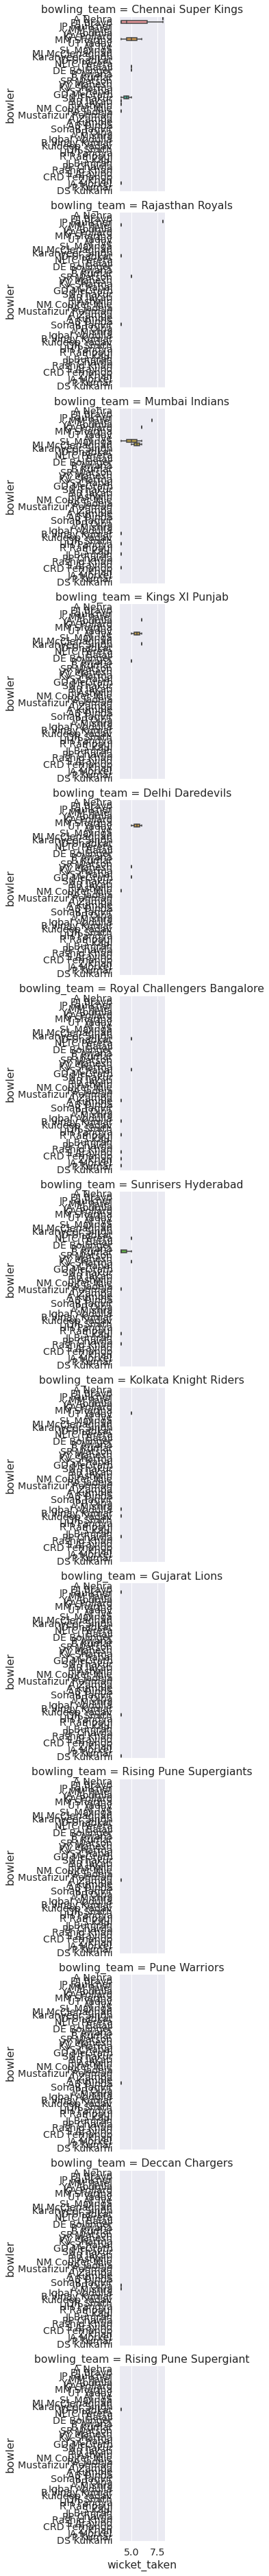

In [ ]:
c = bowling_stats_grouped.head(80)
g = sns.catplot(y="bowler", x="wicket_taken", row="bowling_team", 
                kind="box", orient="h", height=4, aspect=0.5,
                data=c.query("wicket_taken > 3"))
#g.set(xscale="log");


In [ ]:
wickets_bowlers_teams = pd.DataFrame(bowling_stats_grouped.groupby(['bowler','bowling_team','batting_team']).count()['dismissal_kind'])
wickets_bowlers_teams = wickets_bowlers_teams.reset_index()
display(wickets_bowlers_teams.columns)
#wickets_bowlers_teams = wickets_bowlers_teams.set_index('bowler')
wickets_bowlers_teams.head()


Index(['bowler', 'bowling_team', 'batting_team', 'dismissal_kind'], dtype='object')

bowler     bowling_team                 batting_team  \
0  A Ashish Reddy  Deccan Chargers  Chennai Super Kings           
1  A Ashish Reddy  Deccan Chargers  Kings XI Punjab               
2  A Ashish Reddy  Deccan Chargers  Mumbai Indians                
3  A Ashish Reddy  Deccan Chargers  Pune Warriors                 
4  A Ashish Reddy  Deccan Chargers  Royal Challengers Bangalore   

   dismissal_kind  
0  1               
1  2               
2  1               
3  2               
4  2

<Figure size 1080x936 with 0 Axes>

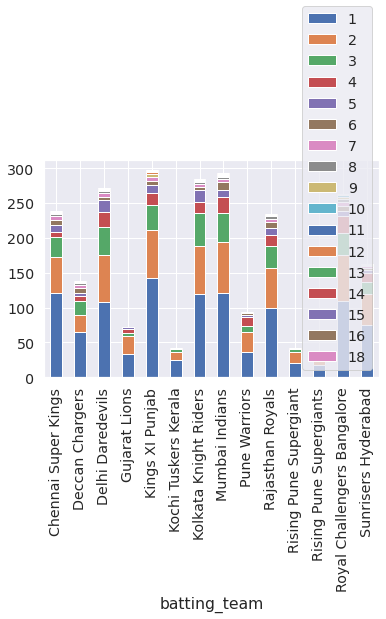

In [ ]:
ct = pd.crosstab(wickets_bowlers_teams.batting_team, wickets_bowlers_teams.dismissal_kind)
ct
#plot stacked bar chart
plt.figure(figsize=(15,13))
sns.set_style("darkgrid")
ct.plot.bar(stacked=True)
plt.legend()
plt.show()

No handles with labels found to put in legend.


TypeError: ignored

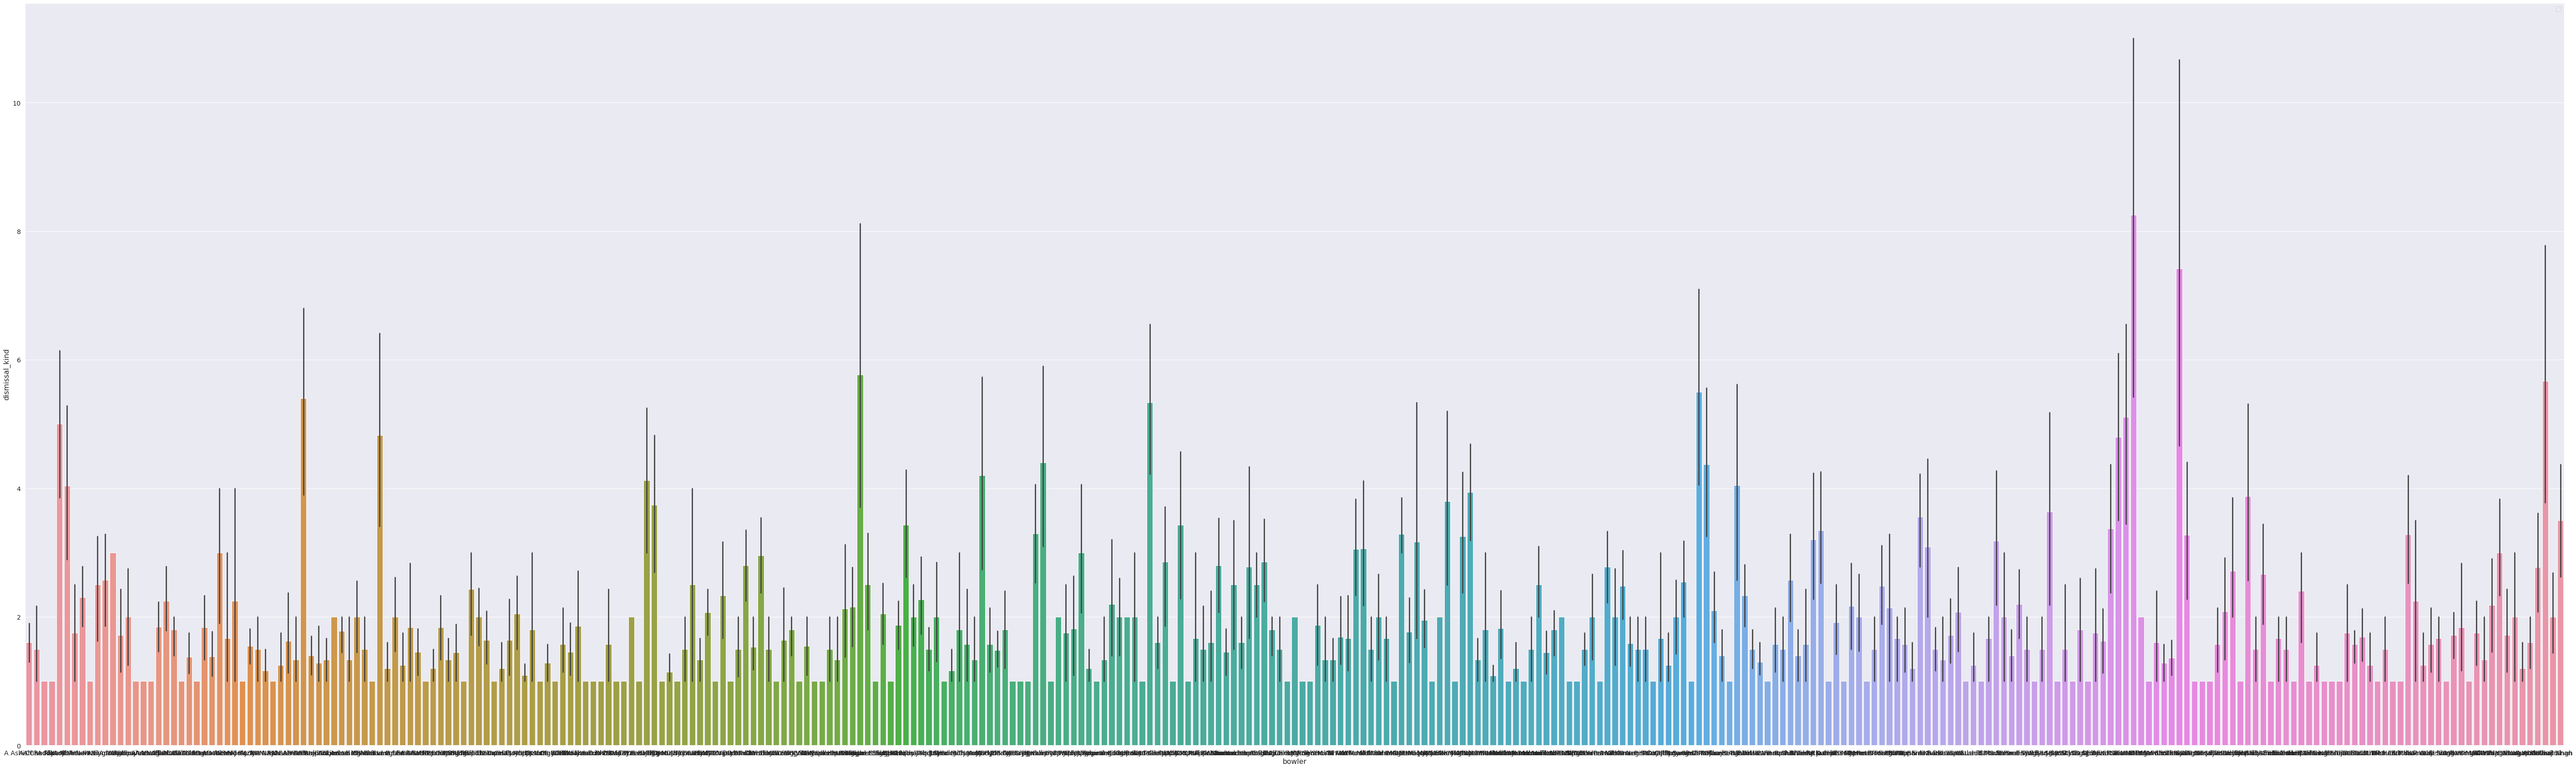

In [ ]:

plt.figure(figsize=(100,30))
sns.set_style("darkgrid")
wkts_plot = sns.barplot(data=wickets_bowlers_teams, x='bowler',y='dismissal_kind')
wkts_plot.legend()
wkts_plot.set_xticklabels(rotation=45)


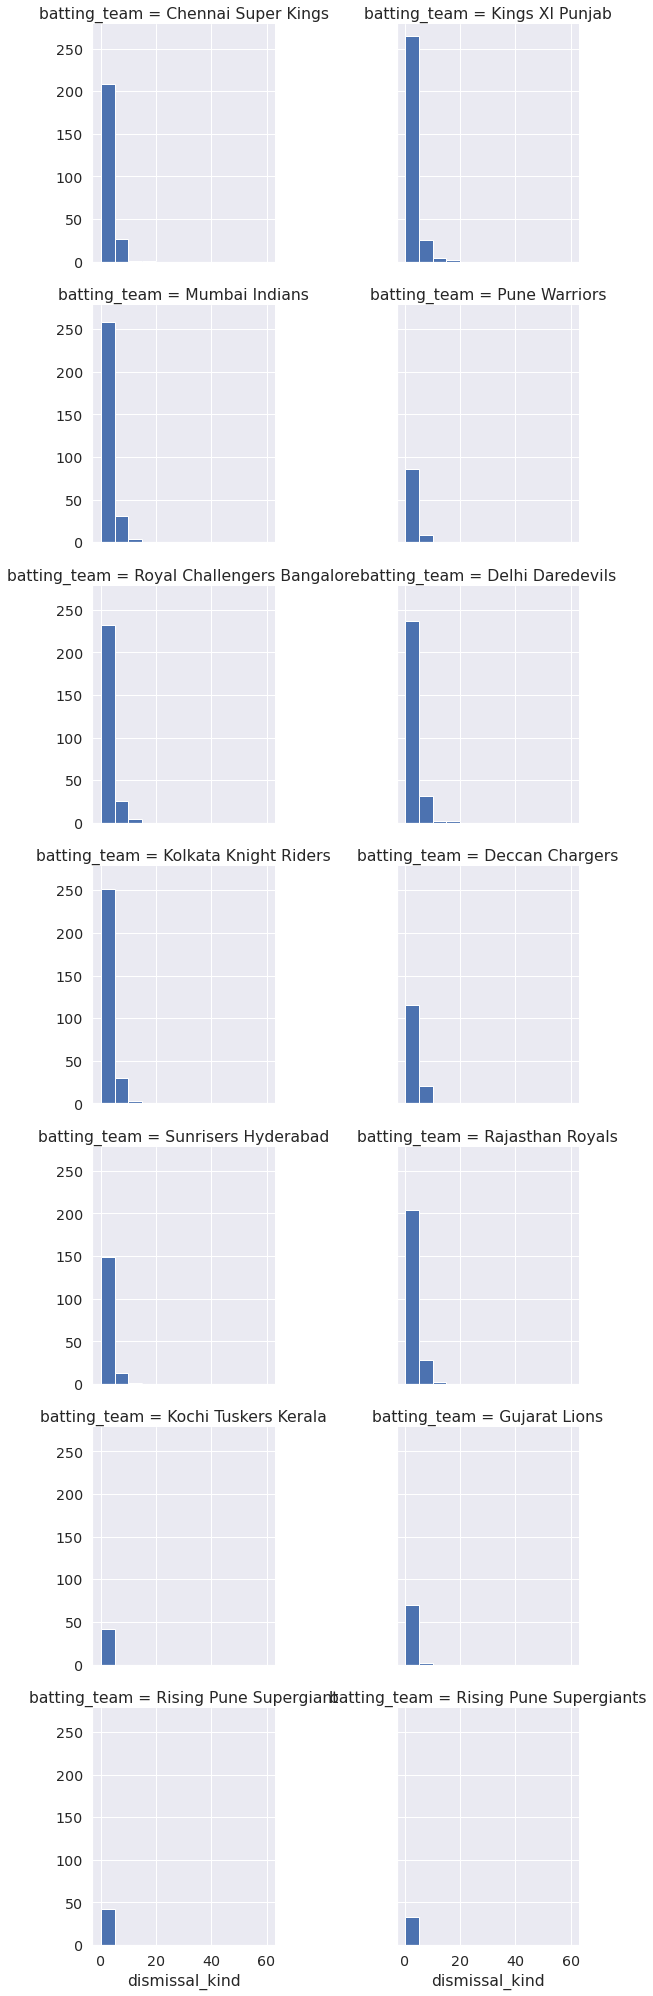

In [ ]:
#att = wickets_bowlers_teams
#g = sns.FacetGrid(att, col="batting_team", col_wrap=4, height=5.5)
#g = g.map(plt.plot, 'bowler', 'bowling_team', marker=".")
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(wickets_bowlers_teams, col="batting_team", col_wrap=2,height=4, aspect=1)
g = (g.map(plt.hist, "dismissal_kind", bins=bins).add_legend())



In [ ]:
bowling_stats_grouped.columns

Index(['season', 'bowling_team', 'bowler', 'batting_team', 'dismissal_kind',
       'extra_runs', 'wicket_taken'],
      dtype='object')

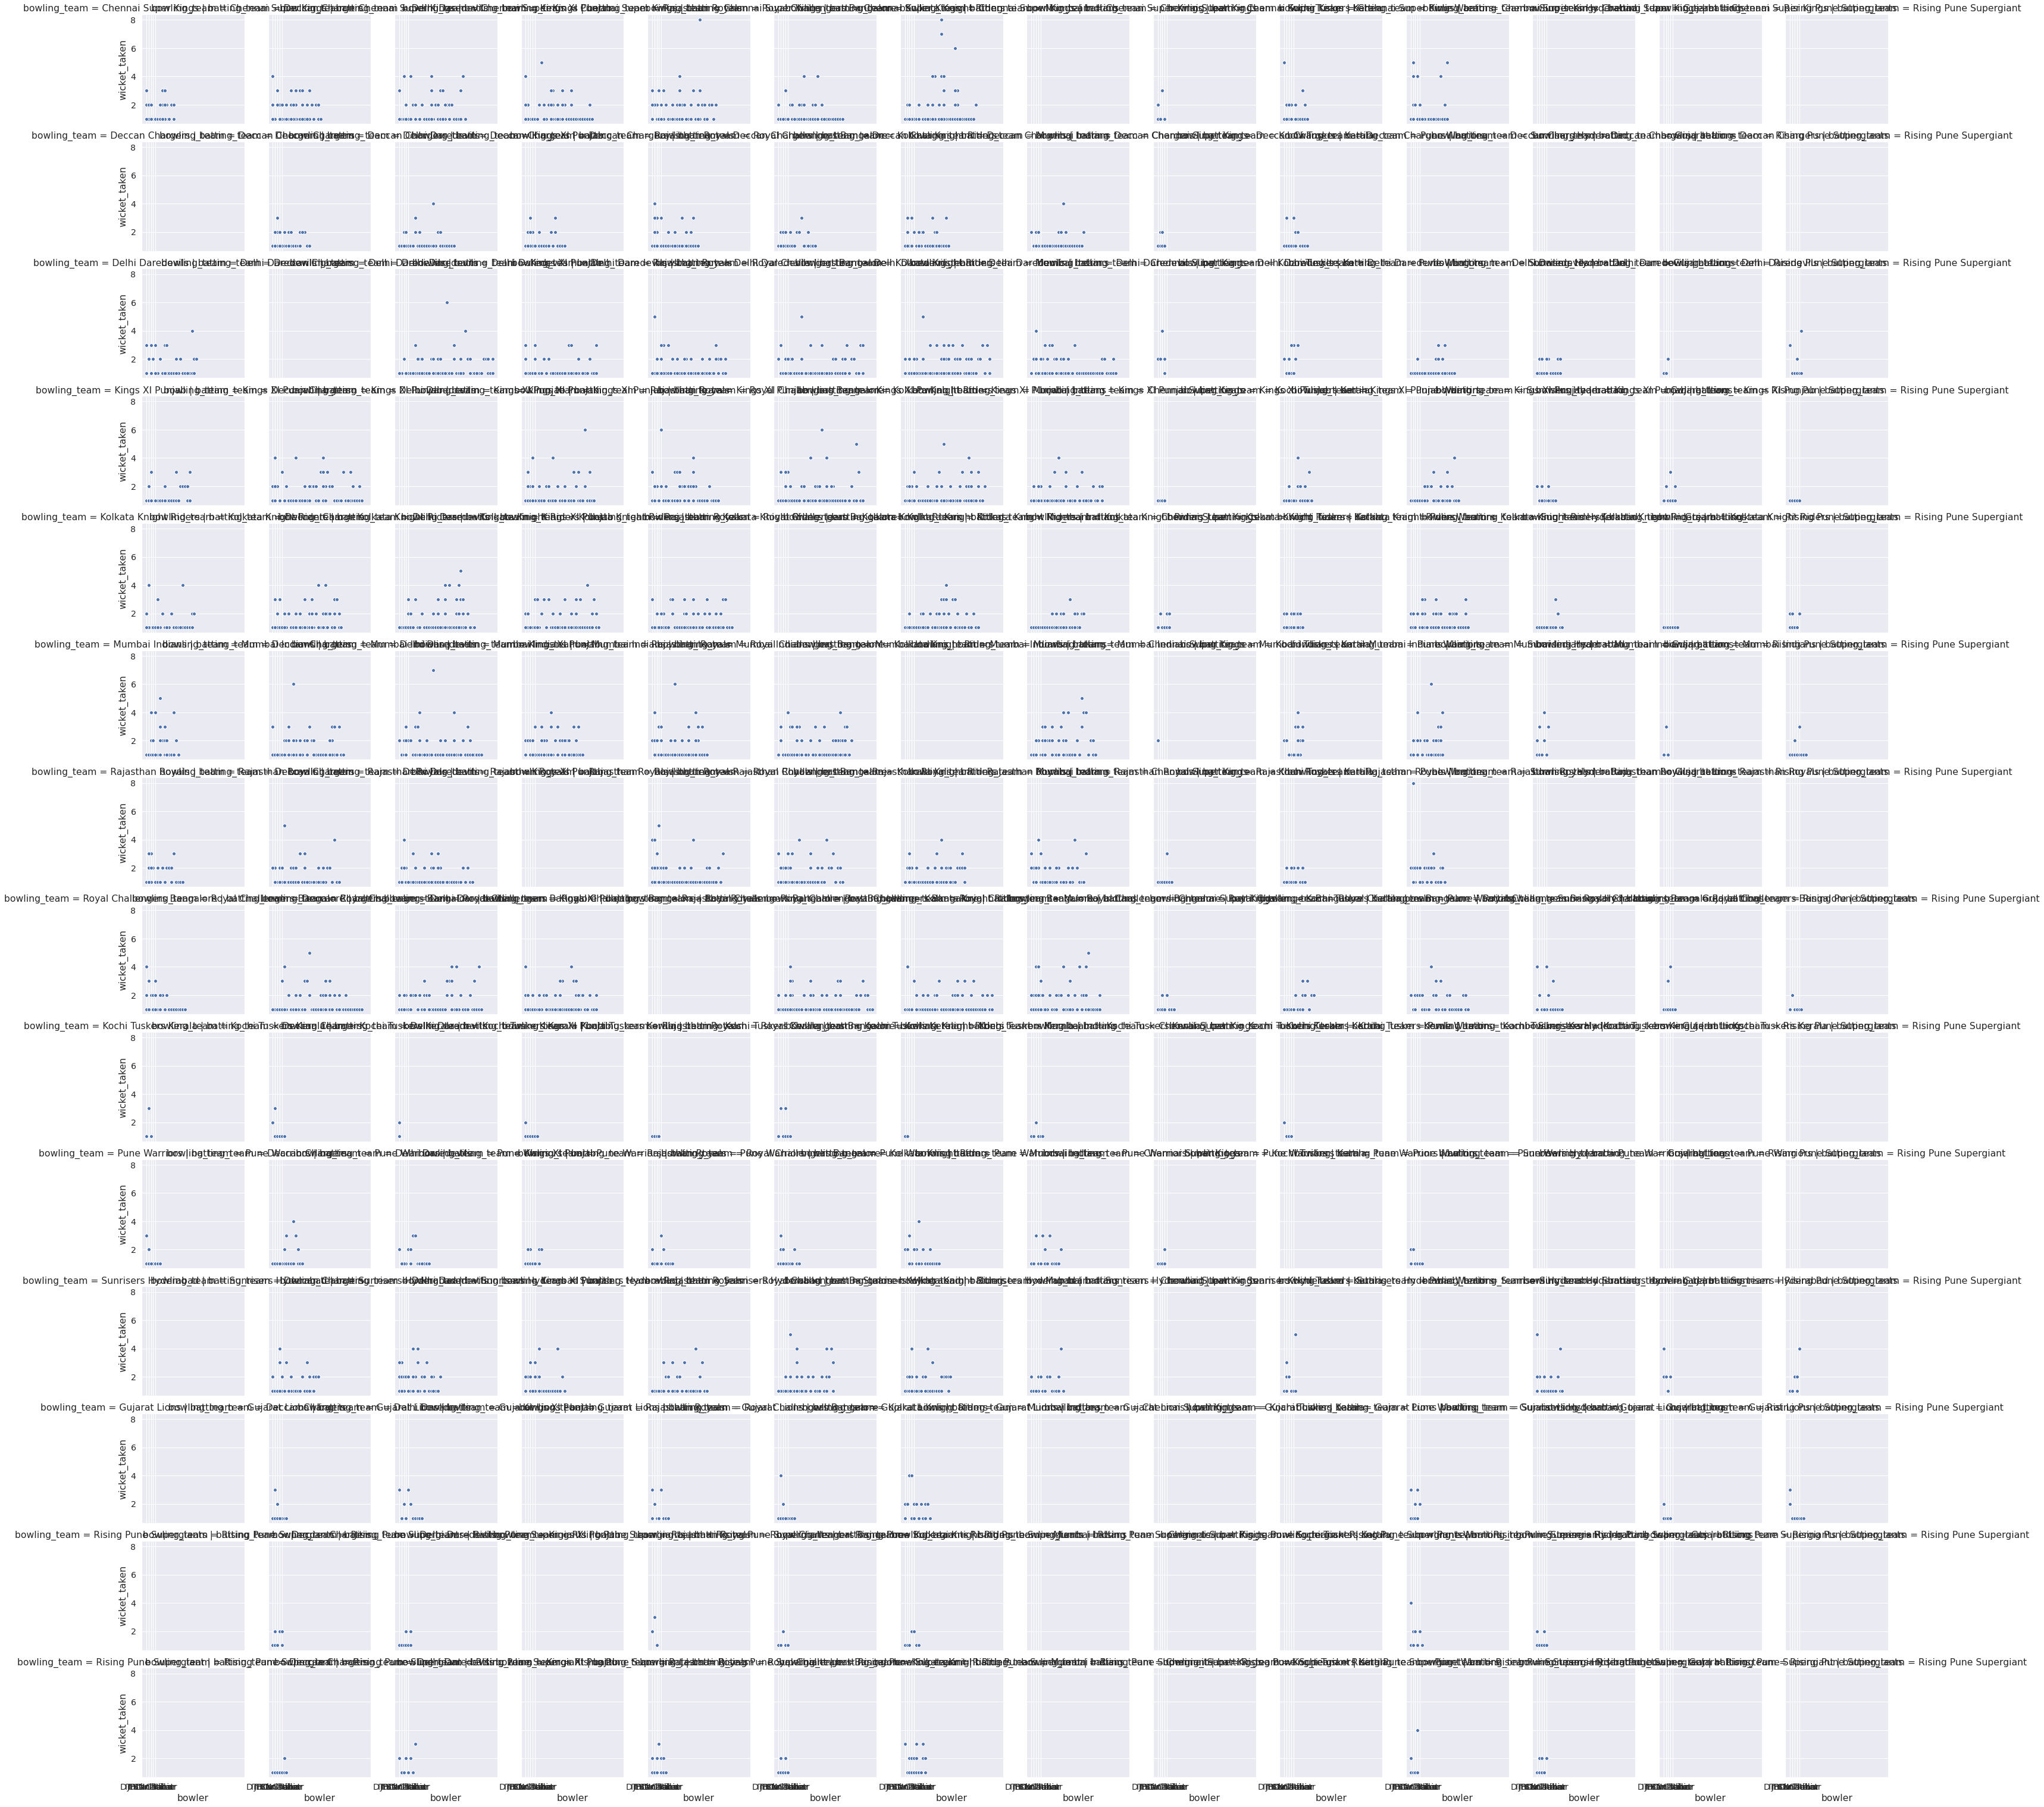

In [ ]:
g = sns.FacetGrid(bowling_stats_grouped, col="batting_team",  row="bowling_team", legend_out=True, despine=True, dropna=True)
g = (g.map(plt.scatter, "bowler", "wicket_taken", edgecolor="w")).add_legend()

In [ ]:
g = sns.catplot(y="bowler", x="dismissal_kind",
                hue="bowling_team", #col="time",
                data=wickets_bowlers_teams, kind="bar",
                height=4, aspect=.7);


In [ ]:
bowling_stats_grouped['bowler'].unique()

array(['JA Morkel', 'JDP Oram', 'Joginder Sharma', 'L Balaji',
       'M Muralitharan', 'M Ntini', 'MS Gony', 'P Amarnath', 'S Vidyut',
       'SK Raina', 'D Kalyankrishna', 'DB Ravi Teja', 'DNT Zoysa',
       'DP Vijaykumar', 'PM Sarvesh Kumar', 'PP Ojha', 'RG Sharma',
       'RP Singh', 'SB Bangar', 'SB Styris', 'Shahid Afridi',
       'WPUJC Vaas', 'Y Venugopal Rao', 'A Mishra', 'B Geeves',
       'DL Vettori', 'GD McGrath', 'MF Maharoof', 'Mohammad Asif',
       'PJ Sangwan', 'R Bhatia', 'Shoaib Malik', 'TM Dilshan', 'V Sehwag',
       'VY Mahesh', 'B Lee', 'Gagandeep Singh', 'IK Pathan', 'JR Hopes',
       'PP Chawla', 'RR Powar', 'S Sreesanth', 'VRV Singh', 'WA Mota',
       'Yuvraj Singh', 'AB Agarkar', 'AB Dinda', 'BAW Mendis',
       'DJ Hussey', 'I Sharma', 'Iqbal Abdulla', 'LR Shukla', 'M Kartik',
       'Mohammad Hafeez', 'SC Ganguly', 'Shoaib Akhtar', 'Umar Gul',
       'A Nehra', 'A Nel', 'AM Nayar', 'CRD Fernando', 'DJ Bravo',
       'DJ Thornely', 'DR Smith', 'DS Kulkar

In [ ]:
bowling_wickets = bowling_stats_grouped.groupby(['season','bowling_team','bowler', 'dismissal_kind']).size()#.sort_values(ascending=False)

bowling_wickets = pd.DataFrame(data = bowling_wickets)
bowling_wickets.reset_index(inplace=True)
bowling_wickets.columns = ['season','bowling_team', 'bowler', 'dismissal_kind', 'wicket_taken']
display(bowling_wickets.columns)
display(bowling_wickets.head(20))

Index(['season', 'bowling_team', 'bowler', 'dismissal_kind', 'wicket_taken'], dtype='object')

season         bowling_team           bowler     dismissal_kind  \
0   2008    Chennai Super Kings  JA Morkel        bowled              
1   2008    Chennai Super Kings  JA Morkel        caught              
2   2008    Chennai Super Kings  JA Morkel        lbw                 
3   2008    Chennai Super Kings  JA Morkel        run out             
4   2008    Chennai Super Kings  JDP Oram         caught              
5   2008    Chennai Super Kings  JDP Oram         caught and bowled   
6   2008    Chennai Super Kings  JDP Oram         run out             
7   2008    Chennai Super Kings  Joginder Sharma  bowled              
8   2008    Chennai Super Kings  Joginder Sharma  caught              
9   2008    Chennai Super Kings  Joginder Sharma  run out             
10  2008    Chennai Super Kings  L Balaji         bowled              
11  2008    Chennai Super Kings  L Balaji         caught              
12  2008    Chennai Super Kings  L Balaji         lbw                 
13  2008    Chennai Super Kings  M Muralitharan   bowled              
14  2008    Chennai Super Kings  M Muralitharan   caught              
15  2008    Chennai Super Kings  M Ntini          bowled              
16  2008    Chennai Super Kings  M Ntini          caught              
17  2008    Chennai Super Kings  M Ntini          run out             
18  2008    Chennai Super Kings  MS Gony          bowled              
19  2008    Chennai Super Kings  MS Gony          caught              

    wicket_taken  
0   3             
1   5             
2   1             
3   2             
4   1             
5   1             
6   2             
7   1             
8   5             
9   1             
10  1             
11  4             
12  1             
13  3             
14  5             
15  2             
16  3             
17  1             
18  4             
19  5

In [ ]:
wickets_across_season = bowling_wickets.groupby(['bowler','bowling_team'])['wicket_taken'].sum().sort_values(ascending=False)[:50]
wickets_across_season

wickets_across_season = pd.DataFrame(data = wickets_across_season)
wickets_across_season.reset_index(inplace=True)
wickets_across_season.columns = ['bowler', 'bowling_team', 'total wickets']
display(wickets_across_season.columns)
display(wickets_across_season.head(20))

Index(['bowler', 'bowling_team', 'total wickets'], dtype='object')

bowler                 bowling_team  total wickets
0   SL Malinga       Mumbai Indians               99           
1   Harbhajan Singh  Mumbai Indians               92           
2   SP Narine        Kolkata Knight Riders        89           
3   R Ashwin         Chennai Super Kings          68           
4   PP Chawla        Kings XI Punjab              68           
5   A Mishra         Delhi Daredevils             68           
6   B Kumar          Sunrisers Hyderabad          62           
7   DJ Bravo         Chennai Super Kings          55           
8   AR Patel         Kings XI Punjab              54           
9   R Vinay Kumar    Royal Challengers Bangalore  53           
10  Sandeep Sharma   Kings XI Punjab              53           
11  JA Morkel        Chennai Super Kings          53           
12  YS Chahal        Royal Challengers Bangalore  51           
13  SR Watson        Rajasthan Royals             50           
14  KA Pollard       Mumbai Indians               48           
15  RA Jadeja        Chennai Super Kings          48           
16  SK Trivedi       Rajasthan Royals             48           
17  PP Ojha          Deccan Chargers              46           
18  SK Warne         Rajasthan Royals             46           
19  JJ Bumrah        Mumbai Indians               44

In [ ]:
bowling_wickets.columns

Index(['season', 'bowling_team', 'bowler', 'dismissal_kind', 'wicket_taken'], dtype='object')

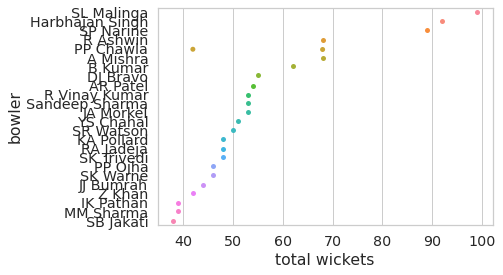

In [ ]:
#sns.catplot(x="wicket_taken", y="bowler", kind="box", data=bowling_wickets);

#sns.catplot(x="wicket_taken", y="bowler", data=bowling_wickets);
bw = wickets_across_season.head(25)
ax = sns.stripplot(x="total wickets", y="bowler",data=bw)


In [ ]:
batting_stats_per_match = df_merge_matches_del.groupby(['season','winner','batsman']).sum()['total_runs'].sort_values(ascending=False)
batting_stats_per_match = pd.DataFrame(data = batting_stats_per_match) #, columns = ['total runs'])
batting_stats_per_match.reset_index(inplace=True)
batting_stats_per_match = batting_stats_per_match.head(50)
batting_stats_per_match


season                       winner         batsman  total_runs
0   2016    Sunrisers Hyderabad          DA Warner       667       
1   2013    Chennai Super Kings          MEK Hussey      665       
2   2016    Royal Challengers Bangalore  V Kohli         650       
3   2011    Royal Challengers Bangalore  CH Gayle        626       
4   2013    Chennai Super Kings          SK Raina        543       
5   2016    Royal Challengers Bangalore  AB de Villiers  522       
6   2013    Royal Challengers Bangalore  CH Gayle        521       
7   2008    Kings XI Punjab              SE Marsh        521       
8   2012    Kolkata Knight Riders        G Gambhir       517       
9   2014    Kings XI Punjab              GJ Maxwell      512       
10  2010    Mumbai Indians               SR Tendulkar    508       
11  2014    Kolkata Knight Riders        RV Uthappa      491       
12  2008    Rajasthan Royals             GC Smith        480       
13  2012    Royal Challengers Bangalore  CH Gayle        480       
14  2015    Mumbai Indians               LMP Simmons     474       
15  2018    Chennai Super Kings          SR Watson       459       
16  2014    Chennai Super Kings          DR Smith        449       
17  2011    Chennai Super Kings          MEK Hussey      446       
18  2018    Chennai Super Kings          AT Rayudu       444       
19  2017    Sunrisers Hyderabad          DA Warner       434       
20  2014    Kings XI Punjab              DA Miller       430       
21  2013    Mumbai Indians               KD Karthik      428       
22  2012    Delhi Daredevils             V Sehwag        427       
23  2015    Royal Challengers Bangalore  CH Gayle        425       
24  2013    Royal Challengers Bangalore  V Kohli         420       
25  2008    Rajasthan Royals             SR Watson       417       
26  2013    Mumbai Indians               RG Sharma       406       
27  2008    Rajasthan Royals             YK Pathan       404       
28  2013    Rajasthan Royals             AM Rahane       404       
29  2015    Sunrisers Hyderabad          DA Warner       403       
30  2017    Kolkata Knight Riders        G Gambhir       394       
31  2010    Chennai Super Kings          M Vijay         389       
32  2014    Kings XI Punjab              V Sehwag        387       
33  2011    Chennai Super Kings          SK Raina        385       
34  2013    Rajasthan Royals             SR Watson       381       
35  2009    Chennai Super Kings          ML Hayden       379       
36  2015    Rajasthan Royals             AM Rahane       377       
37  2015    Chennai Super Kings          BB McCullum     377       
38  2012    Mumbai Indians               RG Sharma       375       
39  2011    Kings XI Punjab              PC Valthaty     374       
40  2018    Sunrisers Hyderabad          S Dhawan        368       
41  2011    Mumbai Indians               SR Tendulkar    366       
42  2018    Sunrisers Hyderabad          KS Williamson   366       
43  2016    Mumbai Indians               RG Sharma       364       
44  2008    Delhi Daredevils             G Gambhir       362       
45  2018    Kolkata Knight Riders        KD Karthik      357       
46  2010    Chennai Super Kings          SK Raina        356       
47  2009    Delhi Daredevils             AB de Villiers  355       
48  2010    Kolkata Knight Riders        SC Ganguly      353       
49  2016    Sunrisers Hyderabad          S Dhawan        351

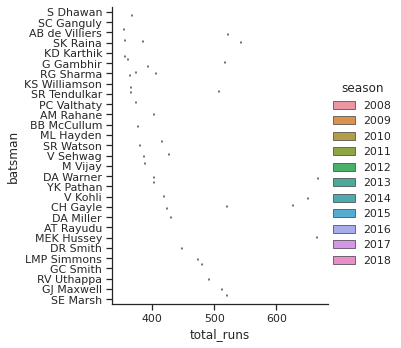

In [ ]:
#ax = sns.boxenplot(x="batsman", y="total_runs", hue="winner",
#                   data=batting_stats_per_match, linewidth=2.5)
sns.set(style="ticks", color_codes=True)
sns.catplot(x="total_runs", y="batsman", kind="boxen", hue='season',
            data=batting_stats_per_match.sort_values("total_runs"));

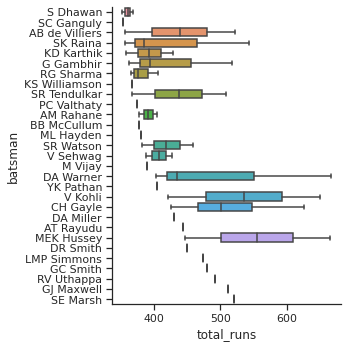

In [ ]:
sns.set(style="ticks", color_codes=True)

sns.catplot(x="total_runs", y="batsman", kind="box",# hue='season',
            data=batting_stats_per_match.sort_values("total_runs"));



In [ ]:

ax = sns.catplot(x="total_runs", y="batsman", hue="winner", kind="bar", data=batting_stats_per_match, palette='Accent');

ax.set_alpha(0.8)
ax.set_title("Dismissals", fontsize=14)
ax.set_xlabel("Number of Wickets", fontsize=14);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=8,
color='dimgrey')

# invert for largest on top 
#ax.invert_yaxis()

In [ ]:
#batting_stats_per_match.pivot_table(index="batsman", columns="batting_team", values="total_runs", 
#                                       aggfunc=["sum"], fill_value=0)


batting_stats_players = batting_stats_per_match.pivot_table(index=["winner","batsman"], columns=["season"],values="total_runs", 
                                       aggfunc=["sum"], fill_value=0,margins = True, margins_name='Total')
batting_stats_players = batting_stats_players.reset_index()
#batting_stats_players.columns = ["winner","batsman", "total_runs"]
#batting_stats_players[batting_stats_players['Total'] > 20]
batting_stats_players.head()


winner      batsman  sum                                \
season                                   2008 2009 2010 2011 2012 2013 2014   
0       Chennai Super Kings  AT Rayudu    0    0    0    0    0    0    0     
1       Chennai Super Kings  BB McCullum  0    0    0    0    0    0    0     
2       Chennai Super Kings  DR Smith     0    0    0    0    0    0    449   
3       Chennai Super Kings  M Vijay      0    0    389  0    0    0    0     
4       Chennai Super Kings  MEK Hussey   0    0    0    446  0    665  0     

                                  
season 2015 2016 2017 2018 Total  
0       0    0    0    444  444   
1       377  0    0    0    377   
2       0    0    0    0    449   
3       0    0    0    0    389   
4       0    0    0    0    1111

In [ ]:
batting_stats_players.columns
#batting_stats_players.reset_index(inplace=True)
batting_stats_players.columns = ['winner','batsman','4','5','6','7','8','9','10','11','12','13','14','Total']
batting_stats_players.columns

Index(['winner', 'batsman', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', 'Total'],
      dtype='object')

In [ ]:
batting_stats_players = batting_stats_players.head(25)
display(batting_stats_players.head())
g = sns.catplot(y="batsman", x="Total",
                #hue="season", #col="winner",
                data=batting_stats_players, kind="boxen",
                height=4, aspect=2.4);

winner      batsman  4  5    6    7  8    9   10   11  12  13  \
0  Chennai Super Kings  AT Rayudu    0  0  0    0    0  0    0    0    0   0    
1  Chennai Super Kings  BB McCullum  0  0  0    0    0  0    0    377  0   0    
2  Chennai Super Kings  DR Smith     0  0  0    0    0  0    449  0    0   0    
3  Chennai Super Kings  M Vijay      0  0  389  0    0  0    0    0    0   0    
4  Chennai Super Kings  MEK Hussey   0  0  0    446  0  665  0    0    0   0    

    14  Total  
0  444  444    
1  0    377    
2  0    449    
3  0    389    
4  0    1111

In [ ]:
batting_stats_winner = df_merge_matches_del.groupby(['match_id','winner','batsman']).sum()['total_runs'].sort_values(ascending=False)
batting_stats_winner = pd.DataFrame(data = batting_stats_winner) #, columns = ['total runs'])
batting_stats_winner.reset_index(inplace=True)
batting_stats_winner = batting_stats_winner.head(20)


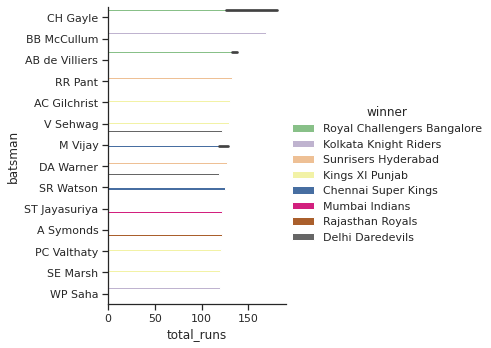

In [ ]:
sns.catplot(x="total_runs", y="batsman", hue="winner", kind="bar", data=batting_stats_winner, palette='Accent');

In [ ]:
df_merge_matches_del.to_csv("ipl_stats.csv")
df_merge_matches_del.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
batting_dismissals = df_merge_matches_del.groupby(['bowling_team','fielder','dismissal_kind']).size().sort_values(ascending=False)
batting_dismissals = pd.DataFrame(data = batting_dismissals, columns = ['wickets'])
batting_dismissals.reset_index(inplace=True)
batting_dismissals.head(20)

bowling_team          fielder dismissal_kind  wickets
0   Chennai Super Kings          SK Raina         caught         81     
1   Chennai Super Kings          MS Dhoni         caught         69     
2   Royal Challengers Bangalore  V Kohli          caught         68     
3   Mumbai Indians               KA Pollard       caught         68     
4   Royal Challengers Bangalore  AB de Villiers   caught         65     
5   Mumbai Indians               RG Sharma        caught         57     
6   Mumbai Indians               AT Rayudu        caught         45     
7   Chennai Super Kings          DJ Bravo         caught         44     
8   Kings XI Punjab              DA Miller        caught         42     
9   Sunrisers Hyderabad          S Dhawan         caught         38     
10  Kings XI Punjab              WP Saha          caught         36     
11  Sunrisers Hyderabad          NV Ojha          caught         36     
12  Rajasthan Royals             AM Rahane        caught         35     
13  Chennai Super Kings          RA Jadeja        caught         33     
14  Chennai Super Kings          M Vijay          caught         33     
15  Rajasthan Royals             SV Samson        caught         32     
16  Kolkata Knight Riders        RV Uthappa       caught         32     
17  Mumbai Indians               HH Pandya        caught         32     
18  Delhi Daredevils             KD Karthik       caught         31     
19  Mumbai Indians               Harbhajan Singh  caught         30

In [ ]:
batting_dismissals.columns

Index(['bowling_team', 'fielder', 'dismissal_kind', 'wickets'], dtype='object')

In [ ]:
batting_dismissals.head()

bowling_team         fielder dismissal_kind  wickets
0  Chennai Super Kings          SK Raina        caught         81     
1  Chennai Super Kings          MS Dhoni        caught         69     
2  Royal Challengers Bangalore  V Kohli         caught         68     
3  Mumbai Indians               KA Pollard      caught         68     
4  Royal Challengers Bangalore  AB de Villiers  caught         65

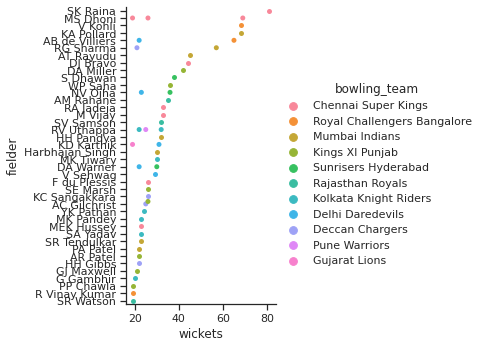

In [ ]:
bd_team = batting_dismissals.head(50)

ax = sns.catplot(y='fielder',x='wickets',hue='bowling_team',kind='swarm', data=bd_team);

**group by dismisals**

In [ ]:
batting_dismissals.dismissal_kind.unique()

array(['run out', 'caught', 'stumped'], dtype=object)

In [ ]:
batting_dismissals_grouped = df_merge_matches_del.groupby(['dismissal_kind','fielder']).size().sort_values(ascending=False)
batting_dismissals_grouped = pd.DataFrame(data = batting_dismissals_grouped, columns = ['total_dismissals'])
batting_dismissals_grouped.reset_index(inplace=True)
batting_dismissals_grouped.head()

dismissal_kind         fielder  total_dismissals
0  caught         KD Karthik      102             
1  caught         SK Raina        92              
2  caught         AB de Villiers  87              
3  caught         MS Dhoni        87              
4  caught         RV Uthappa      80

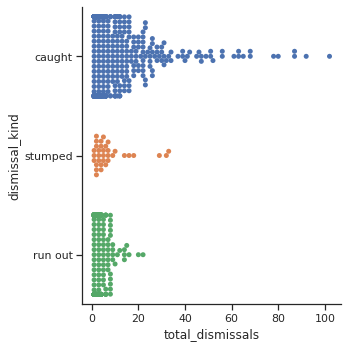

In [ ]:
#should be done on the merged data as we can segregate by seasons
bd = batting_dismissals_grouped
ax = sns.catplot(y='dismissal_kind',x='total_dismissals',kind='swarm', data=bd);

In [ ]:
df_merge_matches_del.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
x_df = df_merge_matches_del.groupby(['season','winner','win_by_runs', 'win_by_wickets', 'player_of_match'])['total_runs'].sum().sort_values(ascending=False)
x_df.head()

season  winner               win_by_runs  win_by_wickets  player_of_match
2016    Mumbai Indians       0            6               RG Sharma          1068
2008    Rajasthan Royals     0            3               YK Pathan          758 
2014    Mumbai Indians       0            5               CJ Anderson        722 
2018    Sunrisers Hyderabad  0            9               S Dhawan           651 
2017    Gujarat Lions        0            7               AJ Tye             612 
Name: total_runs, dtype: int64

In [ ]:
y_df = df_merge_matches_del.groupby(['season','winner'])['total_runs'].sum().sort_values(ascending=False)
y_df.head()

season  winner             
2008    Rajasthan Royals       4135
2014    Kings XI Punjab        4132
2013    Mumbai Indians         3989
2018    Chennai Super Kings    3980
2013    Chennai Super Kings    3835
Name: total_runs, dtype: int64

In [ ]:
team_score = df_merge_matches_del.groupby(['season','match_id','winner','batsman'])['total_runs'].sum().sort_values(ascending=False)
team_score = pd.DataFrame(data = team_score, columns = ['total_runs']) 
team_score.reset_index(inplace=True)
display(team_score.columns)
display(team_score.head())


Index(['season', 'match_id', 'winner', 'batsman', 'total_runs'], dtype='object')

season  match_id                       winner         batsman  total_runs
0  2013    411       Royal Challengers Bangalore  CH Gayle        181       
1  2008    60        Kolkata Knight Riders        BB McCullum     169       
2  2015    562       Royal Challengers Bangalore  AB de Villiers  138       
3  2018    7935      Sunrisers Hyderabad          RR Pant         132       
4  2016    620       Royal Challengers Bangalore  AB de Villiers  132

In [ ]:
team_score.groupby(['match_id', 'winner'])['total_runs'].sum().sort_values(ascending=False)[:10]


match_id  winner                     
7937      Kolkata Knight Riders          471
206       Chennai Super Kings            469
50        Kings XI Punjab                453
61        Chennai Super Kings            447
7904      Rajasthan Royals               435
259       Delhi Daredevils               433
7944      Royal Challengers Bangalore    431
562       Royal Challengers Bangalore    431
7917      Chennai Super Kings            431
68        Rajasthan Royals               431
Name: total_runs, dtype: int64

In [ ]:

bowler_extras = df_merge_matches_del.groupby(['match_id', 'bowler'])['extra_runs'].sum().reset_index()

bowler_extras.columns
bowler_extras = bowler_extras.sort_values(by='extra_runs', ascending=False)

bowler_extras.head(20)





match_id          bowler  extra_runs
4990  418       DP Nannes       14        
5393  451       WD Parnell      12        
985   83        JA Morkel       12        
4871  407       SW Tait         12        
6186  520       MG Johnson      12        
3679  306       AN Ahmed        11        
2631  218       RR Powar        11        
6849  577       I Sharma        11        
6270  527       PJ Cummins      11        
1735  145       SM Harwood      11        
751   64        A Symonds       11        
4013  334       RA Jadeja       11        
3094  256       SW Tait         11        
6627  558       CH Morris       11        
7459  628       B Kumar         11        
2122  176       SW Tait         11        
2672  222       CH Gayle        10        
5529  463       Mohammed Shami  10        
4342  361       SW Tait         10        
1098  92        Umar Gul        10

In [ ]:
bowling_stats.columns

Index(['season', 'match_id', 'inning', 'batting_team', 'bowling_team',
       'player_dismissed', 'dismissal_kind', 'extra_runs', 'bowler',
       'fielder'],
      dtype='object')

In [ ]:
#bowling_extras.columns

In [ ]:

matches_agg = pd.merge(df_matches, team_score, left_on = 'id', right_on = 'match_id', how = 'outer')

team_extras = df_deliveries.groupby(['match_id', 'inning'])['extra_runs'].sum().unstack().reset_index()
team_extras.columns = ['match_id', 'Team1_extras', 'Team2_extras', 'Team1_superover_extras', 'Team2_superover_extras']
matches_agg = pd.merge(matches_agg, team_extras, on = 'match_id', how = 'outer')
#Reorder the columns to make the data more readable
cols = ['id', 'season','city','date','team1','team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs','win_by_wickets',  'player_of_match', 'venue']
matches_agg = matches_agg[cols]
matches_agg

KeyError: ignored

In [ ]:
#merged_df = pd.merge(left=df_matches, right=df_deliveries, left_on=['id'], right_on=['match_id'])
#merged_df.head()


In [ ]:
batsman_grp = df_deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
display(batsmen.head(20))

# Ignore the wide balls.
balls_faced = df_deliveries[df_deliveries["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

fours = df_deliveries[ df_deliveries["batsman_runs"] == 4]
sixes = df_deliveries[ df_deliveries["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = df_deliveries[ pd.notnull(df_deliveries["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = df_matches[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head(20)

match_id  inning                 batting_team        batsman  batsman_runs
0   1         1       Sunrisers Hyderabad          BCJ Cutting    16          
1   1         1       Sunrisers Hyderabad          DA Warner      14          
2   1         1       Sunrisers Hyderabad          DJ Hooda       16          
3   1         1       Sunrisers Hyderabad          MC Henriques   52          
4   1         1       Sunrisers Hyderabad          S Dhawan       40          
5   1         1       Sunrisers Hyderabad          Yuvraj Singh   62          
6   1         2       Royal Challengers Bangalore  A Choudhary    6           
7   1         2       Royal Challengers Bangalore  CH Gayle       32          
8   1         2       Royal Challengers Bangalore  KM Jadhav      31          
9   1         2       Royal Challengers Bangalore  Mandeep Singh  24          
10  1         2       Royal Challengers Bangalore  S Aravind      0           
11  1         2       Royal Challengers Bangalore  SR Watson      22          
12  1         2       Royal Challengers Bangalore  STR Binny      11          
13  1         2       Royal Challengers Bangalore  Sachin Baby    1           
14  1         2       Royal Challengers Bangalore  TM Head        30          
15  1         2       Royal Challengers Bangalore  TS Mills       6           
16  1         2       Royal Challengers Bangalore  YS Chahal      3           
17  2         1       Mumbai Indians               AT Rayudu      10          
18  2         1       Mumbai Indians               HH Pandya      35          
19  2         1       Mumbai Indians               JC Buttler     38

season  match_id  inning                 batting_team        batsman  \
0   2017    1         1       Sunrisers Hyderabad          BCJ Cutting     
1   2017    1         1       Sunrisers Hyderabad          DA Warner       
2   2017    1         1       Sunrisers Hyderabad          DJ Hooda        
3   2017    1         1       Sunrisers Hyderabad          MC Henriques    
4   2017    1         1       Sunrisers Hyderabad          S Dhawan        
5   2017    1         1       Sunrisers Hyderabad          Yuvraj Singh    
6   2017    1         2       Royal Challengers Bangalore  A Choudhary     
7   2017    1         2       Royal Challengers Bangalore  CH Gayle        
8   2017    1         2       Royal Challengers Bangalore  KM Jadhav       
9   2017    1         2       Royal Challengers Bangalore  Mandeep Singh   
10  2017    1         2       Royal Challengers Bangalore  S Aravind       
11  2017    1         2       Royal Challengers Bangalore  SR Watson       
12  2017    1         2       Royal Challengers Bangalore  STR Binny       
13  2017    1         2       Royal Challengers Bangalore  Sachin Baby     
14  2017    1         2       Royal Challengers Bangalore  TM Head         
15  2017    1         2       Royal Challengers Bangalore  TS Mills        
16  2017    1         2       Royal Challengers Bangalore  YS Chahal       
17  2017    2         1       Mumbai Indians               AT Rayudu       
18  2017    2         1       Mumbai Indians               HH Pandya       
19  2017    2         1       Mumbai Indians               JC Buttler      

    batsman_runs  balls_faced   4s   6s      SR     dismissal_kind  \
0   16            6.0          0.0  2.0  266.67  NaN                 
1   14            8.0          2.0  1.0  175.00  caught              
2   16            12.0         0.0  1.0  133.33  NaN                 
3   52            37.0         3.0  2.0  140.54  caught              
4   40            31.0         5.0  0.0  129.03  caught              
5   62            27.0         7.0  3.0  229.63  bowled              
6   6             2.0          0.0  1.0  300.00  NaN                 
7   32            21.0         2.0  3.0  152.38  caught              
8   31            16.0         4.0  1.0  193.75  run out             
9   24            16.0         5.0  0.0  150.00  bowled              
10  0             2.0          0.0  0.0  0.00    bowled              
11  22            17.0         1.0  1.0  129.41  caught              
12  11            10.0         0.0  1.0  110.00  caught              
13  1             3.0          0.0  0.0  33.33   caught              
14  30            22.0         3.0  0.0  136.36  caught              
15  6             3.0          0.0  1.0  200.00  caught              
16  3             7.0          0.0  0.0  42.86   run out             
17  10            12.0         0.0  0.0  83.33   caught and bowled   
18  35            15.0         1.0  4.0  233.33  NaN                 
19  38            19.0         3.0  3.0  200.00  lbw                 

            fielder  
0   NaN              
1   Mandeep Singh    
2   NaN              
3   Sachin Baby      
4   Sachin Baby      
5   NaN              
6   NaN              
7   DA Warner        
8   BCJ Cutting      
9   NaN              
10  NaN              
11  MC Henriques     
12  Yuvraj Singh     
13  MC Henriques     
14  Yuvraj Singh     
15  DA Warner        
16  CJ Jordan (sub)  
17  NaN              
18  NaN              
19  NaN

In [ ]:
#matches_agg.head()

batting_team     batsman  batsman_runs
0  Chennai Super Kings  A Flintoff  62          
1  Chennai Super Kings  A Mukund    0           
2  Chennai Super Kings  A Nehra     1           
3  Chennai Super Kings  AS Rajpoot  2           
4  Chennai Super Kings  AT Rayudu   615

season          2008  2009  2010  2011  2012   2013  2014  2015  2016  2017  \
batsman                                                                       
A Ashish Reddy NaN   NaN   NaN   NaN    35.0  125.0 NaN    73.0  47.0 NaN     
A Chandila     NaN   NaN   NaN   NaN    0.0   4.0   NaN   NaN   NaN   NaN     
A Chopra        42.0  11.0 NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN     
A Choudhary    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN    25.0   
A Dananjaya    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN     

season          2018  Total  
batsman                      
A Ashish Reddy NaN    280.0  
A Chandila     NaN    4.0    
A Chopra       NaN    53.0   
A Choudhary    NaN    25.0   
A Dananjaya     4.0   4.0

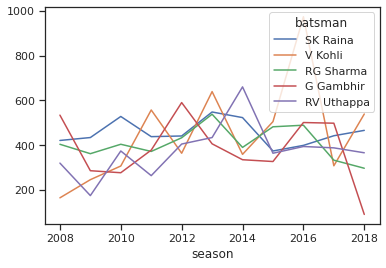

In [ ]:
batsman_runsperseason = df_merge_matches_del.groupby(['batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
display(batsman_runsperseason.head())

batsman_runsperseason = df_merge_matches_del.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
#display(batsman_runsperseason.head())
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1) #add total column to find batsman with the highest runs

display(batsman_runsperseason.head())

batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:5].T.plot()

In [ ]:

bowler_wicketsperseason = df_merge_matches_del.groupby(['season', 'bowler'])['dismissal_kind'].count().unstack().T #'match_id', showing by season now
display(bowler_wicketsperseason.head())

bowler_wicketsperseason = df_merge_matches_del.groupby(['season', 'bowler'])['dismissal_kind'].count().unstack().T

bowler_wicketsperseason['Total'] = bowler_wicketsperseason.count() #add total column to find batsman with the highest runs

display(bowler_wicketsperseason.head())

bowler_wicketsperseason = bowler_wicketsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = bowler_wicketsperseason[:5].T.plot()



season          2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
bowler                                                                       
A Ashish Reddy NaN   NaN   NaN   NaN    11.0  3.0  NaN    4.0   1.0  NaN     
A Chandila     NaN   NaN   NaN   NaN    5.0   6.0  NaN   NaN   NaN   NaN     
A Choudhary    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    5.0    
A Dananjaya    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
A Flintoff     NaN    2.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

season          2018  
bowler                
A Ashish Reddy NaN    
A Chandila     NaN    
A Choudhary    NaN    
A Dananjaya     0.0   
A Flintoff     NaN

season          2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
bowler                                                                       
A Ashish Reddy NaN   NaN   NaN   NaN    11.0  3.0  NaN    4.0   1.0  NaN     
A Chandila     NaN   NaN   NaN   NaN    5.0   6.0  NaN   NaN   NaN   NaN     
A Choudhary    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    5.0    
A Dananjaya    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
A Flintoff     NaN    2.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

season          2018  Total  
bowler                       
A Ashish Reddy NaN   NaN     
A Chandila     NaN   NaN     
A Choudhary    NaN   NaN     
A Dananjaya     0.0  NaN     
A Flintoff     NaN   NaN

#### Winning Teams

In [ ]:
s = df_merge_matches_del.groupby(['season', 'match_id','winner','win_by_runs', 'win_by_wickets','player_of_match']).total_runs.sum().sort_values(ascending=False)
s.head(10)

season  match_id  winner                       win_by_runs  win_by_wickets  player_of_match
2018    7937      Kolkata Knight Riders        31           0               SP Narine          471
2010    206       Chennai Super Kings          23           0               M Vijay            469
2017    50        Kings XI Punjab              7            0               WP Saha            453
2008    61        Chennai Super Kings          33           0               MEK Hussey         447
2018    7904      Rajasthan Royals             19           0               SV Samson          435
2011    259       Delhi Daredevils             29           0               DA Warner          433
2018    7944      Royal Challengers Bangalore  14           0               AB de Villiers     431
        7917      Chennai Super Kings          0            5               MS Dhoni           431
2015    562       Royal Challengers Bangalore  39           0               AB de Villiers     431
2008    68       

In [ ]:
df_merge_matches_del.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
display(df_merge_matches_del.groupby(['season', 'winner']).size())

In [ ]:
#top_teams_by_season = df_merge_matches_del.groupby(['season', 'winner']).size().unstack().T
top_teams_by_season = df_merge_matches_del.groupby(['winner','season'])['total_runs'].sum().unstack()

#top_teams_by_season.columns = ['season' , 'winner' ,'score']
top_teams_by_season.fillna(0, inplace=True)
#top_teams_by_season1 = top_teams_by_season.fillna(0, inplace=True)


display(top_teams_by_season)
top_teams_by_season.columns




season                         2008    2009    2010    2011    2012    2013  \
winner                                                                        
Chennai Super Kings          2945.0  2288.0  2975.0  3461.0  3137.0  3835.0   
Deccan Chargers              601.0   2670.0  2582.0  1688.0  1204.0  0.0      
Delhi Daredevils             2302.0  2872.0  2099.0  1440.0  3123.0  912.0    
Gujarat Lions                0.0     0.0     0.0     0.0     0.0     0.0      
Kings XI Punjab              3179.0  1981.0  1230.0  2327.0  2392.0  2506.0   
Kochi Tuskers Kerala         0.0     0.0     0.0     1661.0  0.0     0.0      
Kolkata Knight Riders        1756.0  817.0   2128.0  2050.0  3446.0  1622.0   
Mumbai Indians               1805.0  1419.0  3649.0  2912.0  3006.0  3989.0   
Pune Warriors                0.0     0.0     0.0     1036.0  1215.0  1226.0   
Rajasthan Royals             4135.0  1750.0  1899.0  1544.0  2238.0  3262.0   
Rising Pune Supergiant       0.0     0.0     0.0     0.0     0.0     0.0      
Rising Pune Supergiants      0.0     0.0     0.0     0.0     0.0     0.0      
Royal Challengers Bangalore  1214.0  2556.0  2321.0  2979.0  2692.0  2818.0   
Sunrisers Hyderabad          0.0     0.0     0.0     0.0     0.0     2432.0   

season                         2014    2015    2016    2017    2018  
winner                                                               
Chennai Super Kings          3006.0  3049.0  0.0     0.0     3980.0  
Deccan Chargers              0.0     0.0     0.0     0.0     0.0     
Delhi Daredevils             584.0   1483.0  2184.0  2155.0  1802.0  
Gujarat Lions                0.0     0.0     2952.0  1368.0  0.0     
Kings XI Punjab              4132.0  929.0   1194.0  2140.0  2087.0  
Kochi Tuskers Kerala         0.0     0.0     0.0     0.0     0.0     
Kolkata Knight Riders        3462.0  2274.0  2270.0  2732.0  3239.0  
Mumbai Indians               2371.0  3279.0  2377.0  3722.0  2204.0  
Pune Warriors                0.0     0.0     0.0     0.0     0.0     
Rajasthan Royals             2094.0  2321.0  0.0     0.0     2347.0  
Rising Pune Supergiant       0.0     0.0     0.0     2971.0  0.0     
Rising Pune Supergiants      0.0     0.0     1329.0  0.0     0.0     
Royal Challengers Bangalore  1471.0  2292.0  3147.0  1016.0  2045.0  
Sunrisers Hyderabad          1811.0  2337.0  3409.0  2682.0  3002.0

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='season')

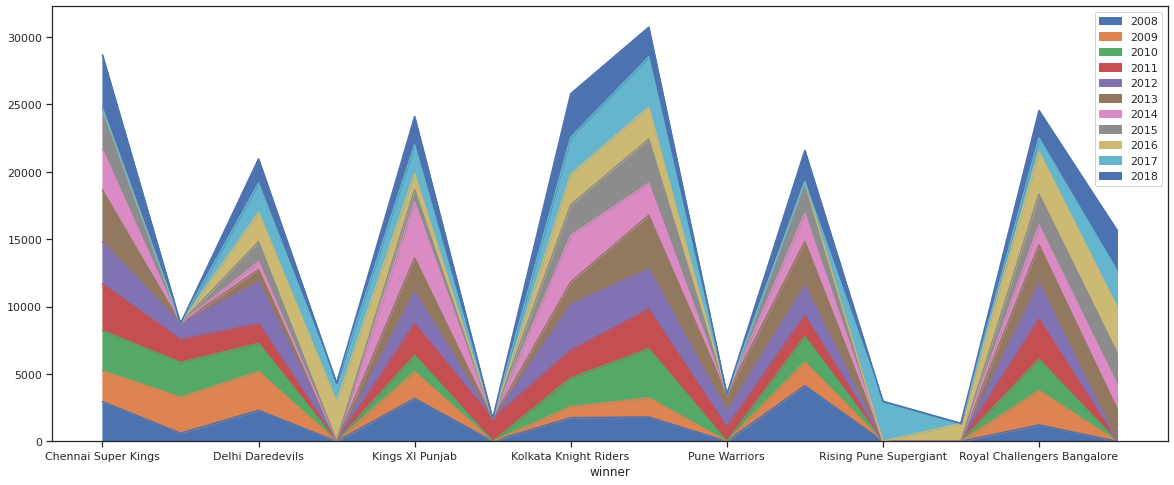

In [ ]:
top_teams_by_season.plot(kind='area', figsize=(20,8)); plt.legend(loc='best');


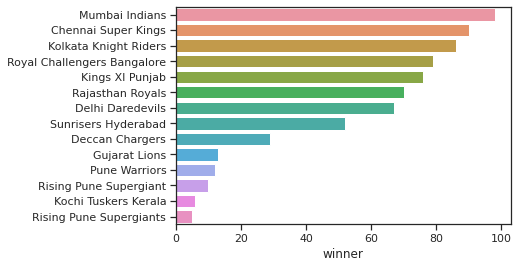

In [ ]:
top_teams=df_matches.winner.value_counts()
sns.barplot(y=top_teams.index,x=top_teams,orient='h');

In [ ]:
top_teams

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala           6 
Rising Pune Supergiants        5 
Name: winner, dtype: int64

In [ ]:
df_merge_matches_del.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

#### Filter on Batsmen and Bowlers

In [ ]:
filter = df_merge_matches_del['winner'].str.contains("Mumbai Indians") & df_merge_matches_del['batting_team'].str.contains("Mumbai Indians") # & df_merge_matches_del['season'].eq(2017)

perf_MumbaiIndians_df = df_merge_matches_del.where(filter) 

perf_MumbaiIndians_df = perf_MumbaiIndians_df[perf_MumbaiIndians_df.winner.notnull()]
display(perf_MumbaiIndians_df.head())


match_id  season    city        date                  team1  \
1552  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1553  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1554  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1555  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1556  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   

               team2     toss_winner toss_decision  result  dl_applied  \
1552  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1553  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1554  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1555  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1556  Mumbai Indians  Mumbai Indians  field         normal  0.0          

              winner  win_by_runs  win_by_wickets player_of_match  \
1552  Mumbai Indians  0.0          4.0             N Rana           
1553  Mumbai Indians  0.0          4.0             N Rana           
1554  Mumbai Indians  0.0          4.0             N Rana           
1555  Mumbai Indians  0.0          4.0             N Rana           
1556  Mumbai Indians  0.0          4.0             N Rana           

                 venue      umpire1    umpire2 umpire3  inning  \
1552  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     2.0      
1553  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     2.0      
1554  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     2.0      
1555  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     2.0      
1556  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     2.0      

        batting_team           bowling_team  over  ball   batsman non_striker  \
1552  Mumbai Indians  Kolkata Knight Riders  1.0   1.0   PA Patel  JC Buttler   
1553  Mumbai Indians  Kolkata Knight Riders  1.0   2.0   PA Patel  JC Buttler   
1554  Mumbai Indians  Kolkata Knight Riders  1.0   3.0   PA Patel  JC Buttler   
1555  Mumbai Indians  Kolkata Knight Riders  1.0   4.0   PA Patel  JC Buttler   
1556  Mumbai Indians  Kolkata Knight Riders  1.0   5.0   PA Patel  JC Buttler   

        bowler  is_super_over  wide_runs  bye_runs  legbye_runs  noball_runs  \
1552  TA Boult  0.0            0.0        0.0       0.0          0.0           
1553  TA Boult  0.0            0.0        0.0       0.0          0.0           
1554  TA Boult  0.0            0.0        0.0       0.0          0.0           
1555  TA Boult  0.0            0.0        0.0       0.0          0.0           
1556  TA Boult  0.0            0.0        0.0       0.0          0.0           

      penalty_runs  batsman_runs  extra_runs  total_runs player_dismissed  \
1552  0.0           0.0           0.0         0.0         NaN               
1553  0.0           0.0           0.0         0.0         NaN               
1554  0.0           4.0           0.0         4.0         NaN               
1555  0.0           0.0           0.0         0.0         NaN               
1556  0.0           1.0           0.0         1.0         NaN               

     dismissal_kind fielder  
1552  NaN            NaN     
1553  NaN            NaN     
1554  NaN            NaN     
1555  NaN            NaN     
1556  NaN            NaN

In [ ]:
perf_MumbaiIndians_pivot_df = pd.pivot_table(perf_MumbaiIndians_df,index=['batsman'], values=['batsman_runs'], aggfunc={'batsman_runs':['sum']}) #removed season from index
perf_MumbaiIndians_pivot_df.reset_index(inplace=True)
perf_MumbaiIndians_pivot_df.columns = ['batsman','total runs']
perf_MumbaiIndians_pivot_df  = perf_MumbaiIndians_pivot_df.sort_values('total runs', ascending=False).head(10)
perf_MumbaiIndians_pivot_df



batsman  total runs
50  RG Sharma      2333.0    
28  KA Pollard     1575.0    
6   AT Rayudu      1562.0    
60  SR Tendulkar   1507.0    
32  LMP Simmons    801.0     
42  PA Patel       638.0     
62  ST Jayasuriya  470.0     
29  KD Karthik     464.0     
30  KH Pandya      425.0     
15  DR Smith       421.0

In [ ]:
perf_MumbaiIndians_pivot_df.columns

Index(['batsman', 'total runs'], dtype='object')

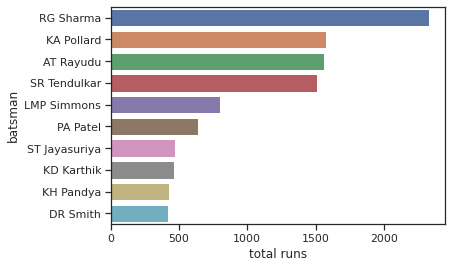

In [ ]:
sns.barplot(data =perf_MumbaiIndians_pivot_df, y='batsman',x='total runs',orient='h');

In [ ]:
filter = df_merge_matches_del['winner'].str.contains("Mumbai Indians") & df_merge_matches_del['bowling_team'].str.contains("Mumbai Indians") & df_merge_matches_del['player_dismissed'].notnull()  #& df_merge_matches_del['season'].eq(2017)

perf_MumbaiIndians_bowling_df = df_merge_matches_del.where(filter) 

perf_MumbaiIndians_bowling_df = perf_MumbaiIndians_bowling_df[perf_MumbaiIndians_bowling_df.winner.notnull()]
display(perf_MumbaiIndians_bowling_df.head())

match_id  season    city        date                  team1  \
1453  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1456  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1474  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1499  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1526  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   

               team2     toss_winner toss_decision  result  dl_applied  \
1453  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1456  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1474  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1499  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1526  Mumbai Indians  Mumbai Indians  field         normal  0.0          

              winner  win_by_runs  win_by_wickets player_of_match  \
1453  Mumbai Indians  0.0          4.0             N Rana           
1456  Mumbai Indians  0.0          4.0             N Rana           
1474  Mumbai Indians  0.0          4.0             N Rana           
1499  Mumbai Indians  0.0          4.0             N Rana           
1526  Mumbai Indians  0.0          4.0             N Rana           

                 venue      umpire1    umpire2 umpire3  inning  \
1453  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1456  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1474  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1499  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1526  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      

               batting_team    bowling_team  over  ball     batsman  \
1453  Kolkata Knight Riders  Mumbai Indians  5.0   2.0   G Gambhir    
1456  Kolkata Knight Riders  Mumbai Indians  5.0   5.0   RV Uthappa   
1474  Kolkata Knight Riders  Mumbai Indians  8.0   3.0   CA Lynn      
1499  Kolkata Knight Riders  Mumbai Indians  12.0  4.0   YK Pathan    
1526  Kolkata Knight Riders  Mumbai Indians  17.0  1.0   SA Yadav     

     non_striker      bowler  is_super_over  wide_runs  bye_runs  legbye_runs  \
1453  CA Lynn     KH Pandya   0.0            0.0        0.0       0.0           
1456  CA Lynn     KH Pandya   0.0            0.0        0.0       0.0           
1474  MK Pandey   JJ Bumrah   0.0            0.0        0.0       0.0           
1499  MK Pandey   KH Pandya   0.0            0.0        0.0       0.0           
1526  MK Pandey   SL Malinga  0.0            0.0        0.0       0.0           

      noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
1453  0.0          0.0           0.0           0.0         0.0          
1456  0.0          0.0           0.0           0.0         0.0          
1474  0.0          0.0           0.0           0.0         0.0          
1499  0.0          0.0           0.0           0.0         0.0          
1526  0.0          0.0           0.0           0.0         0.0          

     player_dismissed dismissal_kind         fielder  
1453  G Gambhir        caught         MJ McClenaghan  
1456  RV Uthappa       caught         HH Pandya       
1474  CA Lynn          lbw            NaN             
1499  YK Pathan        caught         HH Pandya       
1526  SA Yadav         caught         KA Pollard

In [ ]:
perf_MumbaiIndians_bowling_df.head()

match_id  season    city        date                  team1  \
1453  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1456  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1474  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1499  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1526  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   

               team2     toss_winner toss_decision  result  dl_applied  \
1453  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1456  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1474  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1499  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1526  Mumbai Indians  Mumbai Indians  field         normal  0.0          

              winner  win_by_runs  win_by_wickets player_of_match  \
1453  Mumbai Indians  0.0          4.0             N Rana           
1456  Mumbai Indians  0.0          4.0             N Rana           
1474  Mumbai Indians  0.0          4.0             N Rana           
1499  Mumbai Indians  0.0          4.0             N Rana           
1526  Mumbai Indians  0.0          4.0             N Rana           

                 venue      umpire1    umpire2 umpire3  inning  \
1453  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1456  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1474  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1499  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1526  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      

               batting_team    bowling_team  over  ball     batsman  \
1453  Kolkata Knight Riders  Mumbai Indians  5.0   2.0   G Gambhir    
1456  Kolkata Knight Riders  Mumbai Indians  5.0   5.0   RV Uthappa   
1474  Kolkata Knight Riders  Mumbai Indians  8.0   3.0   CA Lynn      
1499  Kolkata Knight Riders  Mumbai Indians  12.0  4.0   YK Pathan    
1526  Kolkata Knight Riders  Mumbai Indians  17.0  1.0   SA Yadav     

     non_striker      bowler  is_super_over  wide_runs  bye_runs  legbye_runs  \
1453  CA Lynn     KH Pandya   0.0            0.0        0.0       0.0           
1456  CA Lynn     KH Pandya   0.0            0.0        0.0       0.0           
1474  MK Pandey   JJ Bumrah   0.0            0.0        0.0       0.0           
1499  MK Pandey   KH Pandya   0.0            0.0        0.0       0.0           
1526  MK Pandey   SL Malinga  0.0            0.0        0.0       0.0           

      noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
1453  0.0          0.0           0.0           0.0         0.0          
1456  0.0          0.0           0.0           0.0         0.0          
1474  0.0          0.0           0.0           0.0         0.0          
1499  0.0          0.0           0.0           0.0         0.0          
1526  0.0          0.0           0.0           0.0         0.0          

     player_dismissed dismissal_kind         fielder  
1453  G Gambhir        caught         MJ McClenaghan  
1456  RV Uthappa       caught         HH Pandya       
1474  CA Lynn          lbw            NaN             
1499  YK Pathan        caught         HH Pandya       
1526  SA Yadav         caught         KA Pollard

In [ ]:
perf_MumbaiIndians_bowlers_pivot_df = pd.pivot_table(perf_MumbaiIndians_bowling_df,index=['bowler'], values=['player_dismissed'], aggfunc={'player_dismissed':['count']}) #removed season from index
perf_MumbaiIndians_bowlers_pivot_df.reset_index(inplace=True)
perf_MumbaiIndians_bowlers_pivot_df.columns = ['bowler','player_dismissed']
perf_MumbaiIndians_bowlers_pivot_df  = perf_MumbaiIndians_bowlers_pivot_df.sort_values('player_dismissed', ascending=False).head(10)
perf_MumbaiIndians_bowlers_pivot_df



bowler  player_dismissed
41  SL Malinga       119             
17  Harbhajan Singh  97              
23  KA Pollard       50              
29  MJ McClenaghan   50              
20  JJ Bumrah        48              
28  MG Johnson       30              
30  MM Patel         29              
33  PP Ojha          25              
24  KH Pandya        25              
14  DS Kulkarni      24

In [ ]:
perf_MumbaiIndians_bowlers_pivot_df.columns

Index(['bowler', 'player_dismissed'], dtype='object')

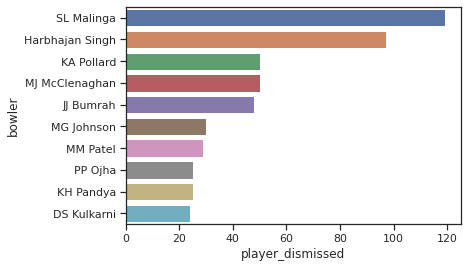

In [ ]:
sns.barplot(data =perf_MumbaiIndians_bowlers_pivot_df, y='bowler',x='player_dismissed',orient='h');

In [ ]:
display(perf_MumbaiIndians_bowling_df.columns)

perf_MI_dismissed = perf_MumbaiIndians_bowling_df[perf_MumbaiIndians_bowling_df.player_dismissed.notnull()]
#perf_MI_dismissed = perf_MI_dismissed.dropna()
perf_MI_dismissed.head()



Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

match_id  season    city        date                  team1  \
1453  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1456  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1474  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1499  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   
1526  7.0       2017.0  Mumbai  2017-04-09  Kolkata Knight Riders   

               team2     toss_winner toss_decision  result  dl_applied  \
1453  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1456  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1474  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1499  Mumbai Indians  Mumbai Indians  field         normal  0.0          
1526  Mumbai Indians  Mumbai Indians  field         normal  0.0          

              winner  win_by_runs  win_by_wickets player_of_match  \
1453  Mumbai Indians  0.0          4.0             N Rana           
1456  Mumbai Indians  0.0          4.0             N Rana           
1474  Mumbai Indians  0.0          4.0             N Rana           
1499  Mumbai Indians  0.0          4.0             N Rana           
1526  Mumbai Indians  0.0          4.0             N Rana           

                 venue      umpire1    umpire2 umpire3  inning  \
1453  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1456  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1474  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1499  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      
1526  Wankhede Stadium  Nitin Menon  CK Nandan  NaN     1.0      

               batting_team    bowling_team  over  ball     batsman  \
1453  Kolkata Knight Riders  Mumbai Indians  5.0   2.0   G Gambhir    
1456  Kolkata Knight Riders  Mumbai Indians  5.0   5.0   RV Uthappa   
1474  Kolkata Knight Riders  Mumbai Indians  8.0   3.0   CA Lynn      
1499  Kolkata Knight Riders  Mumbai Indians  12.0  4.0   YK Pathan    
1526  Kolkata Knight Riders  Mumbai Indians  17.0  1.0   SA Yadav     

     non_striker      bowler  is_super_over  wide_runs  bye_runs  legbye_runs  \
1453  CA Lynn     KH Pandya   0.0            0.0        0.0       0.0           
1456  CA Lynn     KH Pandya   0.0            0.0        0.0       0.0           
1474  MK Pandey   JJ Bumrah   0.0            0.0        0.0       0.0           
1499  MK Pandey   KH Pandya   0.0            0.0        0.0       0.0           
1526  MK Pandey   SL Malinga  0.0            0.0        0.0       0.0           

      noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
1453  0.0          0.0           0.0           0.0         0.0          
1456  0.0          0.0           0.0           0.0         0.0          
1474  0.0          0.0           0.0           0.0         0.0          
1499  0.0          0.0           0.0           0.0         0.0          
1526  0.0          0.0           0.0           0.0         0.0          

     player_dismissed dismissal_kind         fielder  
1453  G Gambhir        caught         MJ McClenaghan  
1456  RV Uthappa       caught         HH Pandya       
1474  CA Lynn          lbw            NaN             
1499  YK Pathan        caught         HH Pandya       
1526  SA Yadav         caught         KA Pollard

In [ ]:
top_players=df_matches.player_of_match.value_counts()[:10] 
#fig,ax=plt.set_xticklabels(top_players.get_xticklabels(), rotation=90, horizontalalignment='right').subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top Player of the Match Winners")
top_players_chart = sns.barplot(x=top_players.index,y=top_players,orient='v')
top_players_chart.set_xticklabels(top_players_chart.get_xticklabels(), rotation=60)
plt.show()


In [ ]:
df_merge_matches_del.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
#bowler_wickets = df_merge_matches_del.groupby(['bowler'])['dismissal_kind'].sum()
#bowler_wickets.sort_values(ascending = False, inplace = True)
#bowler_wickets[:10].plot(x= 'bowler', y = 'runs', kind = 'barh', colormap = 'Accent')

In [ ]:
filter = df_merge_matches_del['winner'].str.contains("Chennai Super Kings") & df_merge_matches_del['batting_team'].str.contains("Chennai Super Kings") # & df_merge_matches_del['season'].eq(2017)

perf_ChennaiSuperKings_df = df_merge_matches_del.where(filter) 

perf_ChennaiSuperKings_df = perf_ChennaiSuperKings_df[perf_ChennaiSuperKings_df.winner.notnull()]
display(perf_ChennaiSuperKings_df.head())


match_id  season        city        date                team1  \
14087  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
14088  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
14089  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
14090  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
14091  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   

                 team2          toss_winner toss_decision  result  dl_applied  \
14087  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
14088  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
14089  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
14090  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
14091  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          

                    winner  win_by_runs  win_by_wickets player_of_match  \
14087  Chennai Super Kings  33.0         0.0             MEK Hussey       
14088  Chennai Super Kings  33.0         0.0             MEK Hussey       
14089  Chennai Super Kings  33.0         0.0             MEK Hussey       
14090  Chennai Super Kings  33.0         0.0             MEK Hussey       
14091  Chennai Super Kings  33.0         0.0             MEK Hussey       

                                            venue    umpire1     umpire2  \
14087  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri   
14088  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri   
14089  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri   
14090  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri   
14091  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri   

      umpire3  inning         batting_team     bowling_team  over  ball  \
14087  NaN     1.0     Chennai Super Kings  Kings XI Punjab  1.0   1.0    
14088  NaN     1.0     Chennai Super Kings  Kings XI Punjab  1.0   2.0    
14089  NaN     1.0     Chennai Super Kings  Kings XI Punjab  1.0   3.0    
14090  NaN     1.0     Chennai Super Kings  Kings XI Punjab  1.0   4.0    
14091  NaN     1.0     Chennai Super Kings  Kings XI Punjab  1.0   5.0    

         batsman non_striker bowler  is_super_over  wide_runs  bye_runs  \
14087  PA Patel   ML Hayden   B Lee  0.0            0.0        0.0        
14088  PA Patel   ML Hayden   B Lee  0.0            0.0        0.0        
14089  PA Patel   ML Hayden   B Lee  0.0            0.0        0.0        
14090  ML Hayden  PA Patel    B Lee  0.0            0.0        0.0        
14091  ML Hayden  PA Patel    B Lee  0.0            0.0        0.0        

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
14087  0.0          0.0          0.0           0.0           0.0          
14088  0.0          0.0          0.0           0.0           0.0          
14089  0.0          0.0          0.0           1.0           0.0          
14090  0.0          0.0          0.0           0.0           0.0          
14091  0.0          0.0          0.0           4.0           0.0          

       total_runs player_dismissed dismissal_kind fielder  
14087  0.0         NaN              NaN            NaN     
14088  0.0         NaN              NaN            NaN     
14089  1.0         NaN              NaN            NaN     
14090  0.0         NaN              NaN            NaN     
14091  4.0         NaN              NaN            NaN

In [ ]:
perf_ChennaiSuperKings_pivot_df = pd.pivot_table(perf_ChennaiSuperKings_df,index=['batsman'], values=['batsman_runs'], aggfunc={'batsman_runs':['sum']}) #removed season from index
perf_ChennaiSuperKings_pivot_df.reset_index(inplace=True)
perf_ChennaiSuperKings_pivot_df.columns = ['batsman','total runs']
perf_ChennaiSuperKings_pivot_df  = perf_ChennaiSuperKings_pivot_df.sort_values('total runs', ascending=False).head(10)
perf_ChennaiSuperKings_pivot_df


batsman  total runs
38  SK Raina      2730.0    
27  MS Dhoni      2174.0    
24  MEK Hussey    1489.0    
22  M Vijay       1135.0    
11  F du Plessis  879.0     
34  S Badrinath   871.0     
25  ML Hayden     730.0     
10  DR Smith      664.0     
3   BB McCullum   593.0     
41  SR Watson     451.0

In [ ]:
perf_ChennaiSuperKings_pivot_df.columns

Index(['batsman', 'total runs'], dtype='object')

In [ ]:
sns.barplot(data =perf_ChennaiSuperKings_pivot_df, y='batsman',x='total runs',orient='h');

In [ ]:

filter = df_merge_matches_del['winner'].str.contains("Chennai Super Kings") & df_merge_matches_del['bowling_team'].str.contains("Chennai Super Kings") & df_merge_matches_del['player_dismissed'].notnull()  #& df_merge_matches_del['season'].eq(2017)

perf_ChennaiSuperKings_bowling_df = df_merge_matches_del.where(filter) 

perf_ChennaiSuperKings_bowling_df = perf_ChennaiSuperKings_bowling_df[perf_ChennaiSuperKings_bowling_df.winner.notnull()]
display(perf_ChennaiSuperKings_bowling_df.head())




match_id  season        city        date                team1  \
14246  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
14275  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
14300  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
14320  61.0      2008.0  Chandigarh  2008-04-19  Chennai Super Kings   
15620  67.0      2008.0  Chennai     2008-04-23  Chennai Super Kings   

                 team2          toss_winner toss_decision  result  dl_applied  \
14246  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
14275  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
14300  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
14320  Kings XI Punjab  Chennai Super Kings  bat           normal  0.0          
15620  Mumbai Indians   Mumbai Indians       field         normal  0.0          

                    winner  win_by_runs  win_by_wickets player_of_match  \
14246  Chennai Super Kings  33.0         0.0             MEK Hussey       
14275  Chennai Super Kings  33.0         0.0             MEK Hussey       
14300  Chennai Super Kings  33.0         0.0             MEK Hussey       
14320  Chennai Super Kings  33.0         0.0             MEK Hussey       
15620  Chennai Super Kings  6.0          0.0             ML Hayden        

                                            venue    umpire1         umpire2  \
14246  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri       
14275  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri       
14300  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri       
14320  Punjab Cricket Association Stadium, Mohali  MR Benson  SL Shastri       
15620  MA Chidambaram Stadium, Chepauk             DJ Harper  GA Pratapkumar   

      umpire3  inning     batting_team         bowling_team  over  ball  \
14246  NaN     2.0     Kings XI Punjab  Chennai Super Kings  6.0   6.0    
14275  NaN     2.0     Kings XI Punjab  Chennai Super Kings  11.0  2.0    
14300  NaN     2.0     Kings XI Punjab  Chennai Super Kings  15.0  2.0    
14320  NaN     2.0     Kings XI Punjab  Chennai Super Kings  18.0  4.0    
15620  NaN     2.0     Mumbai Indians   Chennai Super Kings  1.0   8.0    

             batsman    non_striker           bowler  is_super_over  \
14246  K Goel         JR Hopes       MS Gony          0.0             
14275  JR Hopes       KC Sangakkara  P Amarnath       0.0             
14300  Yuvraj Singh   KC Sangakkara  Joginder Sharma  0.0             
14320  KC Sangakkara  SM Katich      M Muralitharan   0.0             
15620  ST Jayasuriya  L Ronchi       JDP Oram         0.0             

       wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  \
14246  0.0        0.0       0.0          0.0          0.0            
14275  0.0        0.0       0.0          0.0          0.0            
14300  0.0        0.0       0.0          0.0          0.0            
14320  0.0        0.0       0.0          0.0          0.0            
15620  0.0        0.0       0.0          0.0          0.0            

       batsman_runs  extra_runs  total_runs player_dismissed dismissal_kind  \
14246  0.0           0.0         0.0         K Goel           caught          
14275  0.0           0.0         0.0         JR Hopes         caught          
14300  0.0           0.0         0.0         Yuvraj Singh     caught          
14320  0.0           0.0         0.0         KC Sangakkara    caught          
15620  0.0           0.0         0.0         L Ronchi         run out         

               fielder  
14246  PA Patel         
14275  Joginder Sharma  
14300  P Amarnath       
14320  Joginder Sharma  
15620  S Badrinath

In [ ]:
perf_ChennaiSuperKings_bowlers_pivot_df = pd.pivot_table(perf_ChennaiSuperKings_bowling_df,index=['bowler'], values=['player_dismissed'], aggfunc={'player_dismissed':['count']}) #removed season from index
perf_ChennaiSuperKings_bowlers_pivot_df.reset_index(inplace=True)
perf_ChennaiSuperKings_bowlers_pivot_df.columns = ['bowler','player_dismissed']
perf_ChennaiSuperKings_bowlers_pivot_df  = perf_ChennaiSuperKings_bowlers_pivot_df.sort_values('player_dismissed', ascending=False).head(10)
perf_ChennaiSuperKings_bowlers_pivot_df


bowler  player_dismissed
29  R Ashwin        72              
6   DJ Bravo        69              
30  RA Jadeja       57              
13  JA Morkel       53              
25  MM Sharma       52              
34  SB Jakati       41              
5   DE Bollinger    36              
1   A Nehra         27              
23  M Muralitharan  24              
21  L Balaji        23

In [ ]:
perf_ChennaiSuperKings_bowlers_pivot_df.columns

Index(['bowler', 'player_dismissed'], dtype='object')

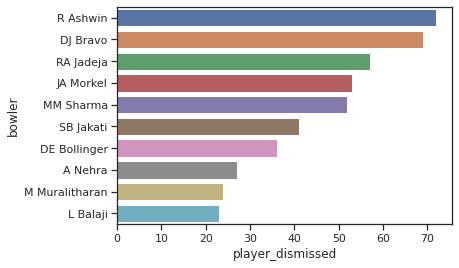

In [ ]:
sns.barplot(data =perf_ChennaiSuperKings_bowlers_pivot_df, y='bowler',x='player_dismissed',orient='h');

In [ ]:
filter = df_merge_matches_del['winner'].str.contains("Kolkata Knight Riders") & df_merge_matches_del['batting_team'].str.contains("Kolkata Knight Riders") # & df_merge_matches_del['season'].eq(2017)

perf_KolkataKnightRiders_df = df_merge_matches_del.where(filter) 

perf_KolkataKnightRiders_df = perf_KolkataKnightRiders_df[perf_KolkataKnightRiders_df.winner.notnull()]
display(perf_KolkataKnightRiders_df.head())

match_id  season    city        date          team1  \
617  3.0       2017.0  Rajkot  2017-04-07  Gujarat Lions   
618  3.0       2017.0  Rajkot  2017-04-07  Gujarat Lions   
619  3.0       2017.0  Rajkot  2017-04-07  Gujarat Lions   
620  3.0       2017.0  Rajkot  2017-04-07  Gujarat Lions   
621  3.0       2017.0  Rajkot  2017-04-07  Gujarat Lions   

                     team2            toss_winner toss_decision  result  \
617  Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
618  Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
619  Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
620  Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
621  Kolkata Knight Riders  Kolkata Knight Riders  field         normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
617  0.0         Kolkata Knight Riders  0.0          10.0             
618  0.0         Kolkata Knight Riders  0.0          10.0             
619  0.0         Kolkata Knight Riders  0.0          10.0             
620  0.0         Kolkata Knight Riders  0.0          10.0             
621  0.0         Kolkata Knight Riders  0.0          10.0             

    player_of_match                                   venue      umpire1  \
617  CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
618  CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
619  CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
620  CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
621  CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   

       umpire2 umpire3  inning           batting_team   bowling_team  over  \
617  CK Nandan  NaN     2.0     Kolkata Knight Riders  Gujarat Lions  1.0    
618  CK Nandan  NaN     2.0     Kolkata Knight Riders  Gujarat Lions  1.0    
619  CK Nandan  NaN     2.0     Kolkata Knight Riders  Gujarat Lions  1.0    
620  CK Nandan  NaN     2.0     Kolkata Knight Riders  Gujarat Lions  1.0    
621  CK Nandan  NaN     2.0     Kolkata Knight Riders  Gujarat Lions  1.0    

     ball    batsman non_striker   bowler  is_super_over  wide_runs  bye_runs  \
617  1.0   G Gambhir  CA Lynn     P Kumar  0.0            0.0        0.0        
618  2.0   CA Lynn    G Gambhir   P Kumar  0.0            0.0        0.0        
619  3.0   CA Lynn    G Gambhir   P Kumar  0.0            0.0        0.0        
620  4.0   G Gambhir  CA Lynn     P Kumar  0.0            0.0        0.0        
621  5.0   G Gambhir  CA Lynn     P Kumar  0.0            0.0        0.0        

     legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
617  0.0          0.0          0.0           1.0           0.0          
618  0.0          0.0          0.0           0.0           0.0          
619  0.0          0.0          0.0           1.0           0.0          
620  0.0          0.0          0.0           0.0           0.0          
621  0.0          0.0          0.0           1.0           0.0          

     total_runs player_dismissed dismissal_kind fielder  
617  1.0         NaN              NaN            NaN     
618  0.0         NaN              NaN            NaN     
619  1.0         NaN              NaN            NaN     
620  0.0         NaN              NaN            NaN     
621  1.0         NaN              NaN            NaN

In [ ]:
perf_KolkataKnightRiders_pivot_df = pd.pivot_table(perf_KolkataKnightRiders_df,index=['batsman'], values=['batsman_runs'], aggfunc={'batsman_runs':['sum']}) #removed season from index
perf_KolkataKnightRiders_pivot_df.reset_index(inplace=True)
perf_KolkataKnightRiders_pivot_df.columns = ['batsman','total runs']
perf_KolkataKnightRiders_pivot_df  = perf_KolkataKnightRiders_pivot_df.sort_values('total runs', ascending=False).head(10)
perf_KolkataKnightRiders_pivot_df


batsman  total runs
17  G Gambhir    2068.0    
46  RV Uthappa   1375.0    
62  YK Pathan    1022.0    
24  JH Kallis    814.0     
31  MK Pandey    730.0     
32  MK Tiwary    587.0     
5   BB McCullum  584.0     
49  SC Ganguly   566.0     
9   CA Lynn      471.0     
53  SP Narine    446.0

In [ ]:
perf_KolkataKnightRiders_pivot_df.columns

Index(['batsman', 'total runs'], dtype='object')

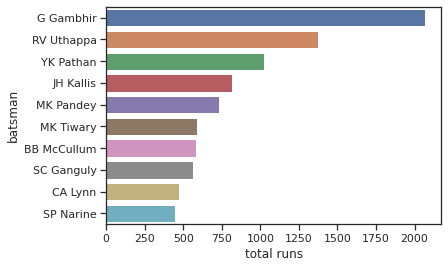

In [ ]:
sns.barplot(data =perf_KolkataKnightRiders_pivot_df, y='batsman',x='total runs',orient='h');

In [ ]:

filter = df_merge_matches_del['winner'].str.contains("Kolkata Knight Riders") & df_merge_matches_del['bowling_team'].str.contains("Kolkata Knight Riders") & df_merge_matches_del['player_dismissed'].notnull()  #& df_merge_matches_del['season'].eq(2017)

perf_KolkataKnightRiders_bowling_df = df_merge_matches_del.where(filter) 

perf_KolkataKnightRiders_bowling_df = perf_KolkataKnightRiders_bowling_df[perf_KolkataKnightRiders_bowling_df.winner.notnull()]
display(perf_KolkataKnightRiders_bowling_df.head())




match_id  season     city        date            team1  \
514   3.0       2017.0  Rajkot   2017-04-07  Gujarat Lions     
544   3.0       2017.0  Rajkot   2017-04-07  Gujarat Lions     
557   3.0       2017.0  Rajkot   2017-04-07  Gujarat Lions     
615   3.0       2017.0  Rajkot   2017-04-07  Gujarat Lions     
2390  11.0      2017.0  Kolkata  2017-04-13  Kings XI Punjab   

                      team2            toss_winner toss_decision  result  \
514   Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
544   Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
557   Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
615   Kolkata Knight Riders  Kolkata Knight Riders  field         normal   
2390  Kolkata Knight Riders  Kolkata Knight Riders  field         normal   

      dl_applied                 winner  win_by_runs  win_by_wickets  \
514   0.0         Kolkata Knight Riders  0.0          10.0             
544   0.0         Kolkata Knight Riders  0.0          10.0             
557   0.0         Kolkata Knight Riders  0.0          10.0             
615   0.0         Kolkata Knight Riders  0.0          10.0             
2390  0.0         Kolkata Knight Riders  0.0          8.0              

     player_of_match                                   venue      umpire1  \
514   CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
544   CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
557   CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
615   CA Lynn         Saurashtra Cricket Association Stadium  Nitin Menon   
2390  SP Narine       Eden Gardens                            A Deshmukh    

        umpire2 umpire3  inning     batting_team           bowling_team  over  \
514   CK Nandan  NaN     1.0     Gujarat Lions    Kolkata Knight Riders  4.0    
544   CK Nandan  NaN     1.0     Gujarat Lions    Kolkata Knight Riders  9.0    
557   CK Nandan  NaN     1.0     Gujarat Lions    Kolkata Knight Riders  11.0   
615   CK Nandan  NaN     1.0     Gujarat Lions    Kolkata Knight Riders  20.0   
2390  NJ Llong   NaN     1.0     Kings XI Punjab  Kolkata Knight Riders  6.0    

      ball      batsman  non_striker         bowler  is_super_over  wide_runs  \
514   1.0   JJ Roy       BB McCullum  PP Chawla      0.0            0.0         
544   1.0   BB McCullum  SK Raina     Kuldeep Yadav  0.0            0.0         
557   2.0   AJ Finch     SK Raina     Kuldeep Yadav  0.0            0.0         
615   5.0   KD Karthik   SK Raina     TA Boult       0.0            0.0         
2390  1.0   M Vohra      HM Amla      PP Chawla      0.0            0.0         

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
514   0.0       0.0          0.0          0.0           0.0            
544   0.0       0.0          0.0          0.0           0.0            
557   0.0       0.0          0.0          0.0           0.0            
615   0.0       0.0          0.0          0.0           0.0            
2390  0.0       0.0          0.0          0.0           0.0            

      extra_runs  total_runs player_dismissed dismissal_kind        fielder  
514   0.0         0.0         JJ Roy           caught         YK Pathan      
544   0.0         0.0         BB McCullum      lbw            NaN            
557   0.0         0.0         AJ Finch         caught         Kuldeep Yadav  
615   0.0         0.0         KD Karthik       caught         Kuldeep Yadav  
2390  0.0         0.0         M Vohra          bowled         NaN

In [ ]:
perf_KolkataKnightRiders_bowlers_pivot_df = pd.pivot_table(perf_KolkataKnightRiders_bowling_df,index=['bowler'], values=['player_dismissed'], aggfunc={'player_dismissed':['count']}) #removed season from index
perf_KolkataKnightRiders_bowlers_pivot_df.reset_index(inplace=True)
perf_KolkataKnightRiders_bowlers_pivot_df.columns = ['bowler','player_dismissed']
perf_KolkataKnightRiders_bowlers_pivot_df  = perf_KolkataKnightRiders_bowlers_pivot_df.sort_values('player_dismissed', ascending=False).head(10)
perf_KolkataKnightRiders_bowlers_pivot_df


bowler  player_dismissed
46  SP Narine        83              
52  UT Yadav         42              
36  PP Chawla        38              
48  Shakib Al Hasan  31              
3   AD Russell       30              
22  L Balaji         28              
19  JH Kallis        27              
15  Iqbal Abdulla    25              
37  R Bhatia         22              
25  M Morkel         22

In [ ]:
perf_KolkataKnightRiders_bowlers_pivot_df.columns

Index(['bowler', 'player_dismissed'], dtype='object')

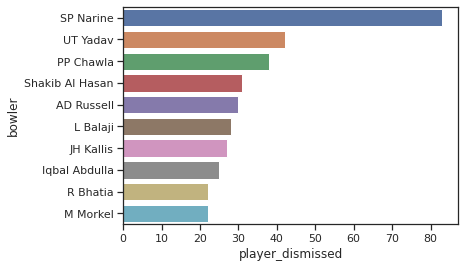

In [ ]:
sns.barplot(data =perf_KolkataKnightRiders_bowlers_pivot_df, y='bowler',x='player_dismissed',orient='h');

SyntaxError: ignored

In [ ]:
batsman_runs = df_merge_matches_del.groupby(['batting_team','batsman'])['batsman_runs'].sum().sort_values(ascending=False)

batsman_runs = pd.DataFrame(data = batsman_runs)
batsman_runs.reset_index(inplace=True)
#batsman_runs.columns = ['season','bowling_team', 'bowler', 'dismissal_kind', 'wicket_taken']
#display(bowling_wickets.columns)
batsman_runs = batsman_runs.head(20)
display(batsman_runs.head(20))

batting_team         batsman  batsman_runs
0   Royal Challengers Bangalore  V Kohli         4962        
1   Chennai Super Kings          SK Raina        4173        
2   Chennai Super Kings          MS Dhoni        3467        
3   Mumbai Indians               RG Sharma       3334        
4   Royal Challengers Bangalore  AB de Villiers  3303        
5   Royal Challengers Bangalore  CH Gayle        3175        
6   Kolkata Knight Riders        G Gambhir       3035        
7   Sunrisers Hyderabad          DA Warner       2579        
8   Sunrisers Hyderabad          S Dhawan        2550        
9   Mumbai Indians               KA Pollard      2492        
10  Kings XI Punjab              SE Marsh        2489        
11  Rajasthan Royals             AM Rahane       2435        
12  Mumbai Indians               AT Rayudu       2416        
13  Rajasthan Royals             SR Watson       2378        
14  Mumbai Indians               SR Tendulkar    2334        
15  Delhi Daredevils             V Sehwag        2174        
16  Kolkata Knight Riders        RV Uthappa      2172        
17  Kolkata Knight Riders        YK Pathan       1893        
18  Chennai Super Kings          MEK Hussey      1768        
19  Kings XI Punjab              DA Miller       1642

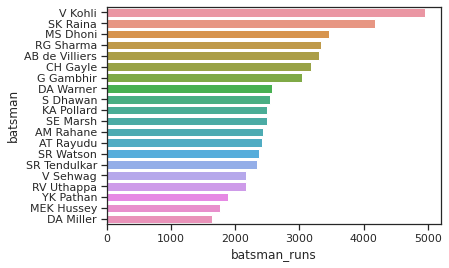

In [ ]:
sns.barplot(data =batsman_runs, x='batsman_runs',y='batsman',orient='h');